In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,184 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import statsmodels.api as sm

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 보유 농기계
* owndata에서 종류와 기종에 대한 정의가 기존의 데이터와 다른 것 같음
* 일단 기종으로 합친다

In [ ]:
owndata = pd.read_excel('/content/drive/MyDrive/data/장비관리대장(제출)편집본.xlsx', sheet_name = 0)
owndata = owndata[['No',  '기대번호','종류', '기종', '형식(규격)', '구입수량','지역']].loc[:628]

In [ ]:
owndata.head(1) #사업소별 보유 농기계 데이터

,No,기대번호,종류,기종,형식(규격),구입수량,지역
0,1,14-1226,곡물정선기,곡물정선기,KA330 / 모터용,1.0,농업기술센터


In [ ]:
owncount = pd.DataFrame({'보유수' : owndata.groupby(['기종','지역'])[['기종','지역']].size()}).reset_index()
owncount.rename(columns = {'지역' : '임대사업장'}, inplace = True)
owncount.head(1) #사업소 별 보유 농기계 건수 데이터

,기종,임대사업장,보유수
0,곡물정선기,농업기술센터,2


In [ ]:
owncount['기종'].nunique()

47

In [ ]:
# #임대사업장 상관없이 안동시가 농기계 기종을 보유한 수
# owncountall = owncount[['기종','보유수']].groupby(['기종'], as_index = False).sum()
# owncountall.head(1)

,기종,보유수
0,곡물정선기,5


In [ ]:
# weeknum 필요없으면 굳이 없어도 될 코드
"""
nor2 = pd.read_csv('/content/drive/MyDrive/data/nor2.csv', encoding = 'euc-kr')
nor2.rename(columns = {'Unnamed: 38' : 'weeknum'}, inplace = True)

date = nor2[['날짜','weeknum']].copy()
date.rename(columns = {'날짜' : 'date'}, inplace = True)
date.head(1)
"""

In [ ]:
finaldata = pd.read_csv('/content/drive/MyDrive/data/address.csv', encoding = 'euc-kr')
finaldata.drop(columns = ['Unnamed: 0','기종2','일시'], axis = 1, inplace = True)

In [ ]:
finaldata['읍면동'] = finaldata['주소'].str.split(' ').str[2]
finaldata['month'] = finaldata['date'].str.split('-').str[1]
finaldata.rename(columns = {'주소' : '빌려간 사람의 주소'}, inplace = True)

In [ ]:
tmpdate = pd.DataFrame({'대여건수' : finaldata.groupby(['임대사업장','종류','date'])[['임대사업장','종류','date']].size()}).reset_index()
tmpdate.rename(columns = {'종류' : '기종'}, inplace = True)
tmpdate.head(1)

In [ ]:
tmpdate2 = tmpdate.copy() # 임대사업장, 종류 일별로 대여 건수
# tmpdate2.rename(columns = {'종류' : '기종'}, inplace = True)
tmpdate2.head(1) = tmpdate.head(1)

,임대사업장,기종,date,대여건수
0,농업기술센터,곡물정선기,2018-02-10,1


In [ ]:
date 16724(tmpdate.row)만 유지해야함
# tmp = pd.merge(tmpdate2, date, on = 'date')
tmp = pd.merge(tmpdate, date, on = 'date')
tmpdate = pd.merge(tmpdate, date, on = 'date')
tmpdate
# tmp = tmpdate

,임대사업장,기종,date,대여건수,weeknum
0,농업기술센터,곡물정선기,2018-02-10,1,6
1,농업기술센터,동력파쇄기,2018-02-10,2,6
2,북부분소,동력예취기,2018-02-10,1,6
3,북부분소,퇴비살포기,2018-02-10,2,6
4,서부분소,퇴비살포기,2018-02-10,1,6
...,...,...,...,...,...
16719,서부분소,농용파이프벤딩성형기,2018-08-31,1,35
16720,서부분소,휴립복토기,2018-08-31,1,35
16721,서부분소,돌수집기,2018-01-17,1,3
16722,서부분소,동력파쇄기,2018-02-04,1,5


In [ ]:
owncount.head(1)

,기종,임대사업장,보유수
0,곡물정선기,농업기술센터,2


In [ ]:
count = pd.merge(owncount, tmpdate, on = ['임대사업장','기종'], how = 'right')
count

,기종,임대사업장,보유수,date,대여건수,weeknum
0,곡물정선기,농업기술센터,2,2018-02-10,1,6
1,곡물정선기,농업기술센터,2,2018-09-11,2,37
2,곡물정선기,농업기술센터,2,2018-09-12,1,37
3,곡물정선기,농업기술센터,2,2018-09-27,1,39
4,곡물정선기,농업기술센터,2,2018-10-25,1,43
...,...,...,...,...,...,...
16719,논두렁조성기,북부분소,2,2020-05-25,1,22
16720,진압기,농업기술센터,1,2020-12-09,1,50
16721,농산물선별기,서부분소,1,2020-07-08,1,28
16722,농산물선별기,서부분소,1,2020-07-09,1,28


In [ ]:
count['year'] = count['date'].str.split('-').str[0]
count

,기종,임대사업장,보유수,date,대여건수,weeknum,year
0,곡물정선기,농업기술센터,2,2018-02-10,1,6,2018
1,곡물정선기,농업기술센터,2,2018-09-11,2,37,2018
2,곡물정선기,농업기술센터,2,2018-09-12,1,37,2018
3,곡물정선기,농업기술센터,2,2018-09-27,1,39,2018
4,곡물정선기,농업기술센터,2,2018-10-25,1,43,2018
...,...,...,...,...,...,...,...
16719,논두렁조성기,북부분소,2,2020-05-25,1,22,2020
16720,진압기,농업기술센터,1,2020-12-09,1,50,2020
16721,농산물선별기,서부분소,1,2020-07-08,1,28,2020
16722,농산물선별기,서부분소,1,2020-07-09,1,28,2020


In [ ]:
# count_day = count[['기종','임대사업장','보유수','대여건수','date']].groupby(['기종','임대사업장','보유수','date'], as_index = False).mean()
# 일 별 총 대여건수
sumbydate = count[['기종','임대사업장','보유수','대여건수','date']].groupby(['기종','임대사업장','보유수','date'], as_index = False).sum()
sumbydate['ratio'] = sumbydate['대여건수'] / sumbydate['보유수']

In [ ]:
sumbydate.head(1)

,기종,임대사업장,보유수,date,대여건수,ratio,year
0,곡물정선기,농업기술센터,2,2018-02-10,1,0.5,2018


In [ ]:
sumbydate['year'] = sumbydate['date'].str.split('-').str[0]
year = sumbydate[['기종','임대사업장','ratio','year']].groupby(['기종','임대사업장','ratio'],as_index = False).nunique()

In [ ]:
year.head(3)

,기종,임대사업장,ratio,year
0,곡물정선기,농업기술센터,0.5,3
1,곡물정선기,농업기술센터,1.0,3
2,곡물정선기,북부분소,1.0,1


In [ ]:
year[(year['year'] == 3) & (year['ratio'] >= 1)]['기종'].nunique()

13

In [ ]:
year[(year['year'] == 3) & (year['ratio'] >= 1)][['기종']].value_counts()
#3년간 1이상이었던 날이 몇 번있었는가?

기종      
콩정선기        11
잔가지파쇄기       3
농산물탈피기       3
보행경운기        2
모우어          2
승용관리기        1
동력파종기        1
동력예취기        1
동력분무기        1
농업용동력운반차     1
농업용고소작업차     1
그레이더         1
곡물정선기        1
dtype: int64

In [ ]:
year[(year['year'] == 3) & (year['ratio'] >= 1)][['기종','임대사업장']].value_counts()

기종        임대사업장 
콩정선기      농업기술센터    5
          북부분소      4
          서부분소      2
동력예취기     농업기술센터    1
그레이더      농업기술센터    1
농산물탈피기    농업기술센터    1
          북부분소      1
          서부분소      1
농업용고소작업차  농업기술센터    1
농업용동력운반차  농업기술센터    1
동력분무기     농업기술센터    1
모우어       북부분소      1
동력파종기     농업기술센터    1
모우어       서부분소      1
보행경운기     농업기술센터    1
          북부분소      1
승용관리기     농업기술센터    1
잔가지파쇄기    농업기술센터    1
          북부분소      1
          서부분소      1
곡물정선기     농업기술센터    1
dtype: int64

In [ ]:
sumbydate[(sumbydate['기종'] == '곡물정선기') & (sumbydate['임대사업장'] == '농업기술센터')]['ratio'].value_counts()

0.5    94
1.0    17
Name: ratio, dtype: int64

In [ ]:
sumbydate[sumbydate['ratio'] >= 1][['기종','임대사업장']].value_counts()

기종          임대사업장 
농업용고소작업차    농업기술센터    124
농산물탈피기      북부분소       97
콩정선기        농업기술센터     85
            북부분소       82
            서부분소       60
농산물탈피기      농업기술센터     59
농업용동력운반차    농업기술센터     50
농산물탈피기      서부분소       37
잔가지파쇄기      서부분소       34
모우어         북부분소       33
동력파종기       농업기술센터     33
잔가지파쇄기      농업기술센터     32
            북부분소       27
보행경운기       농업기술센터     21
모우어         서부분소       20
곡물정선기       농업기술센터     17
동력분무기       농업기술센터     15
곡물정선기       북부분소       13
동력예취기       농업기술센터     12
승용관리기       농업기술센터     11
그레이더        농업기술센터     10
보행경운기       북부분소       10
동력살포기       서부분소       10
            북부분소        8
농산물선별기      서부분소        3
휴대용자동전동가위   농업기술센터      3
돌수집기        농업기술센터      3
곡물정선기       서부분소        3
모우어         농업기술센터      3
제초기         북부분소        2
농용파이프벤딩성형기  서부분소        2
휴대용자동전동가위   서부분소        2
굴삭기         농업기술센터      1
휴립기         농업기술센터      1
논두렁조성기      북부분소        1
스피드스프레이어    북부분소        1
진압기         농업기술센터      1
동력이식기       농업기술센터 

In [ ]:
# sumbydate00[sumbydate00['ratio'] >= 1][['기종']].value_counts()

기종      
농업용고소작업차    124
콩정선기         74
동력파종기        33
동력분무기        15
그레이더         10
농산물탈피기        2
휴립기           1
진압기           1
잔가지파쇄기        1
dtype: int64

In [ ]:
sumbydate[sumbydate['ratio'] > 1][['기종','임대사업장']].value_counts()

기종        임대사업장 
콩정선기      북부분소      61
          농업기술센터    59
          서부분소      32
농업용동력운반차  농업기술센터     6
보행경운기     농업기술센터     1
모우어       서부분소       1
동력살포기     서부분소       1
농산물탈피기    북부분소       1
dtype: int64

In [ ]:
# 콩정선기
sumbydate[sumbydate['기종'] == '콩정선기']

,기종,임대사업장,보유수,date,대여건수,ratio
12977,콩정선기,농업기술센터,3,2018-11-15,1,0.333333
12978,콩정선기,농업기술센터,3,2018-11-19,3,1.000000
12979,콩정선기,농업기술센터,3,2018-11-20,1,0.333333
12980,콩정선기,농업기술센터,3,2018-11-21,1,0.333333
12981,콩정선기,농업기술센터,3,2018-11-22,8,2.666667
...,...,...,...,...,...,...
13418,콩정선기,서부분소,3,2020-12-23,1,0.333333
13419,콩정선기,서부분소,3,2020-12-28,1,0.333333
13420,콩정선기,서부분소,3,2020-12-29,1,0.333333
13421,콩정선기,서부분소,3,2020-12-30,1,0.333333


# 시각화
- 

In [ ]:
west = pd.read_csv('/content/drive/MyDrive/data/data2/westdata.csv',encoding = 'euc-kr')
cen = pd.read_csv('/content/drive/MyDrive/data/data2/cendata.csv',encoding = 'euc-kr')
nor = pd.read_csv('/content/drive/MyDrive/data/data2/nordata.csv',encoding = 'euc-kr')

In [ ]:
west['date'] = pd.to_datetime(west['date'])
cen['date'] = pd.to_datetime(cen['date'])
nor['date'] = pd.to_datetime(nor['date'])

In [ ]:
# event = pd.read_excel('/content/drive/MyDrive/data/data2/event.xlsx')
# event.rename(columns = {'Unnamed: 0':'event'}, inplace = True)

event = pd.read_excel('/content/drive/MyDrive/data/data2/eventbysm.xlsx')
event.head(1)

,event,date
0,입춘,2018-02-04


In [ ]:
event['date_str'] = event['date'].astype('str')

event['year'] = event['date_str'].str.split('-').str[0]
event['month'] = event['date_str'].str.split('-').str[1]
event['day'] = event['date_str'].str.split('-').str[2]
event.head(1)

,event,date,date_str,year,month,day
0,입춘,2018-02-04,2018-02-04,2018,02,04


In [ ]:
event['year'] = event['year'].astype('int')
event['month'] = event['month'].astype('int')
event['day'] = event['day'].astype('int')

In [ ]:
event['event'].nunique()

24

In [ ]:
tmp = nor[nor['종류'] == '농산물탈피기']

tmp = pd.merge(tmp, event, on = 'date', how = 'left')
tmp.head(1)

,Unnamed: 0,date,종류,건수,event
0,0,2018-01-02,콩정선기,2.0,NaN


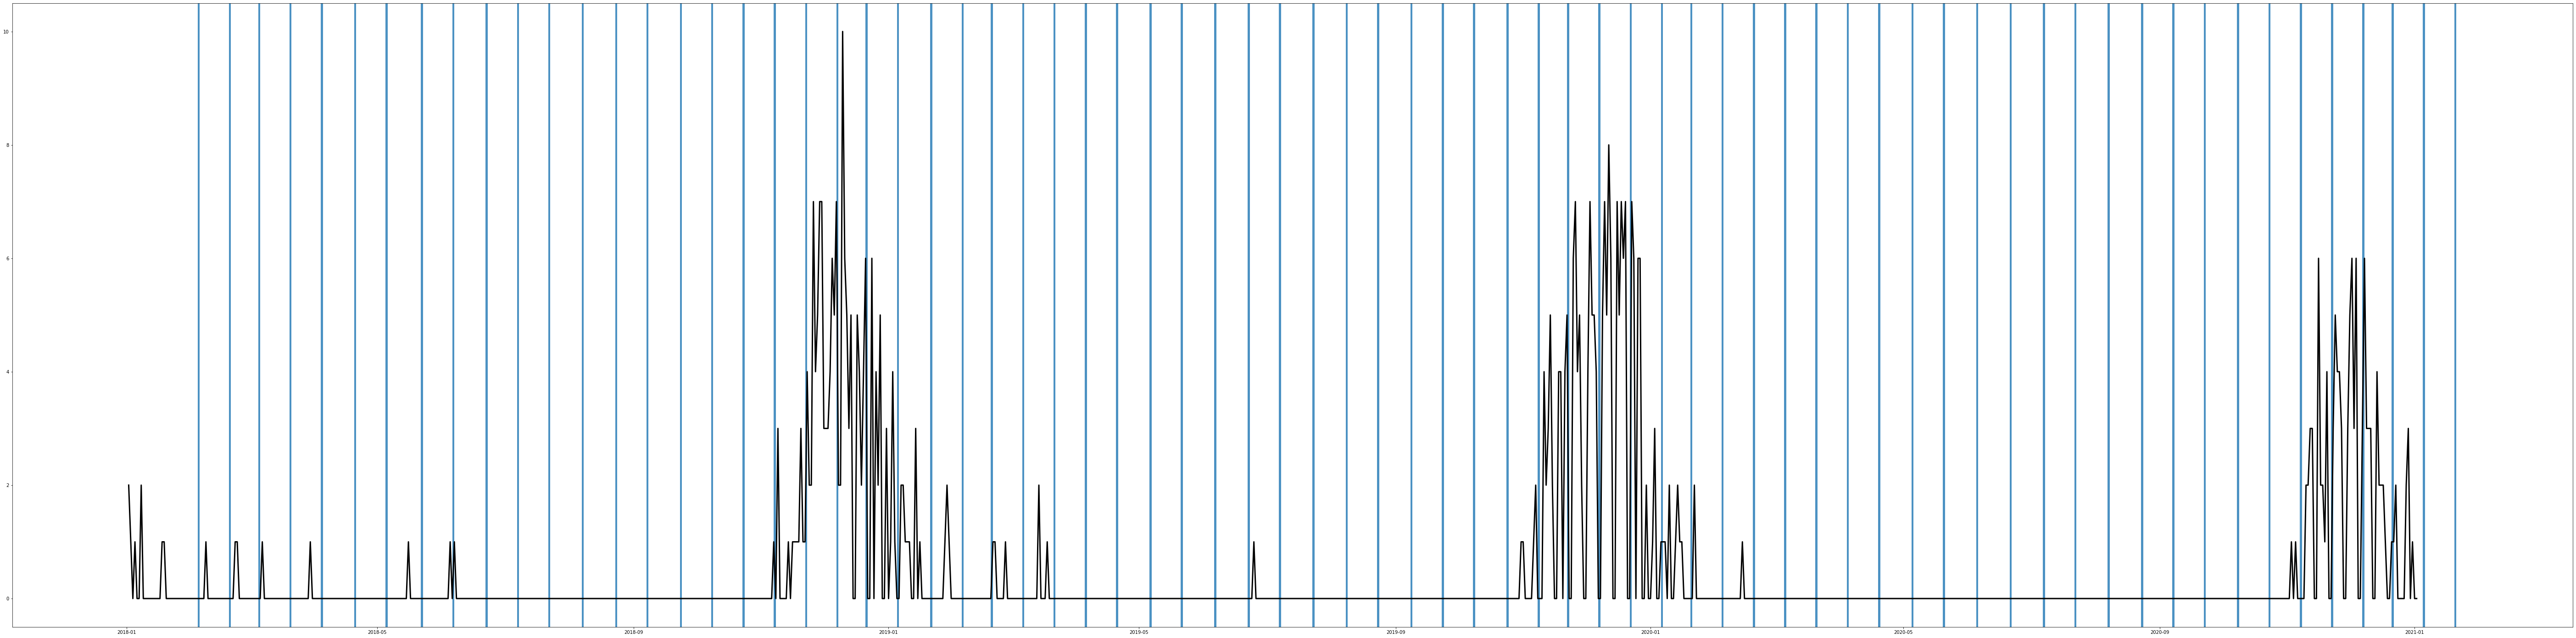

In [ ]:
plt.subplots(figsize = (100,25))

plt.plot(tmp['date'], tmp['건수'], linewidth = 3, color = 'black')
# c = ['red','blue','gray','pink']
for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'grey', alpha=0.8)

# for j in 
# for i in range(7, len(patches)): # 8번째부터 마지막 구간을
#     patches[i].set_facecolor('gold') 

plt.show()

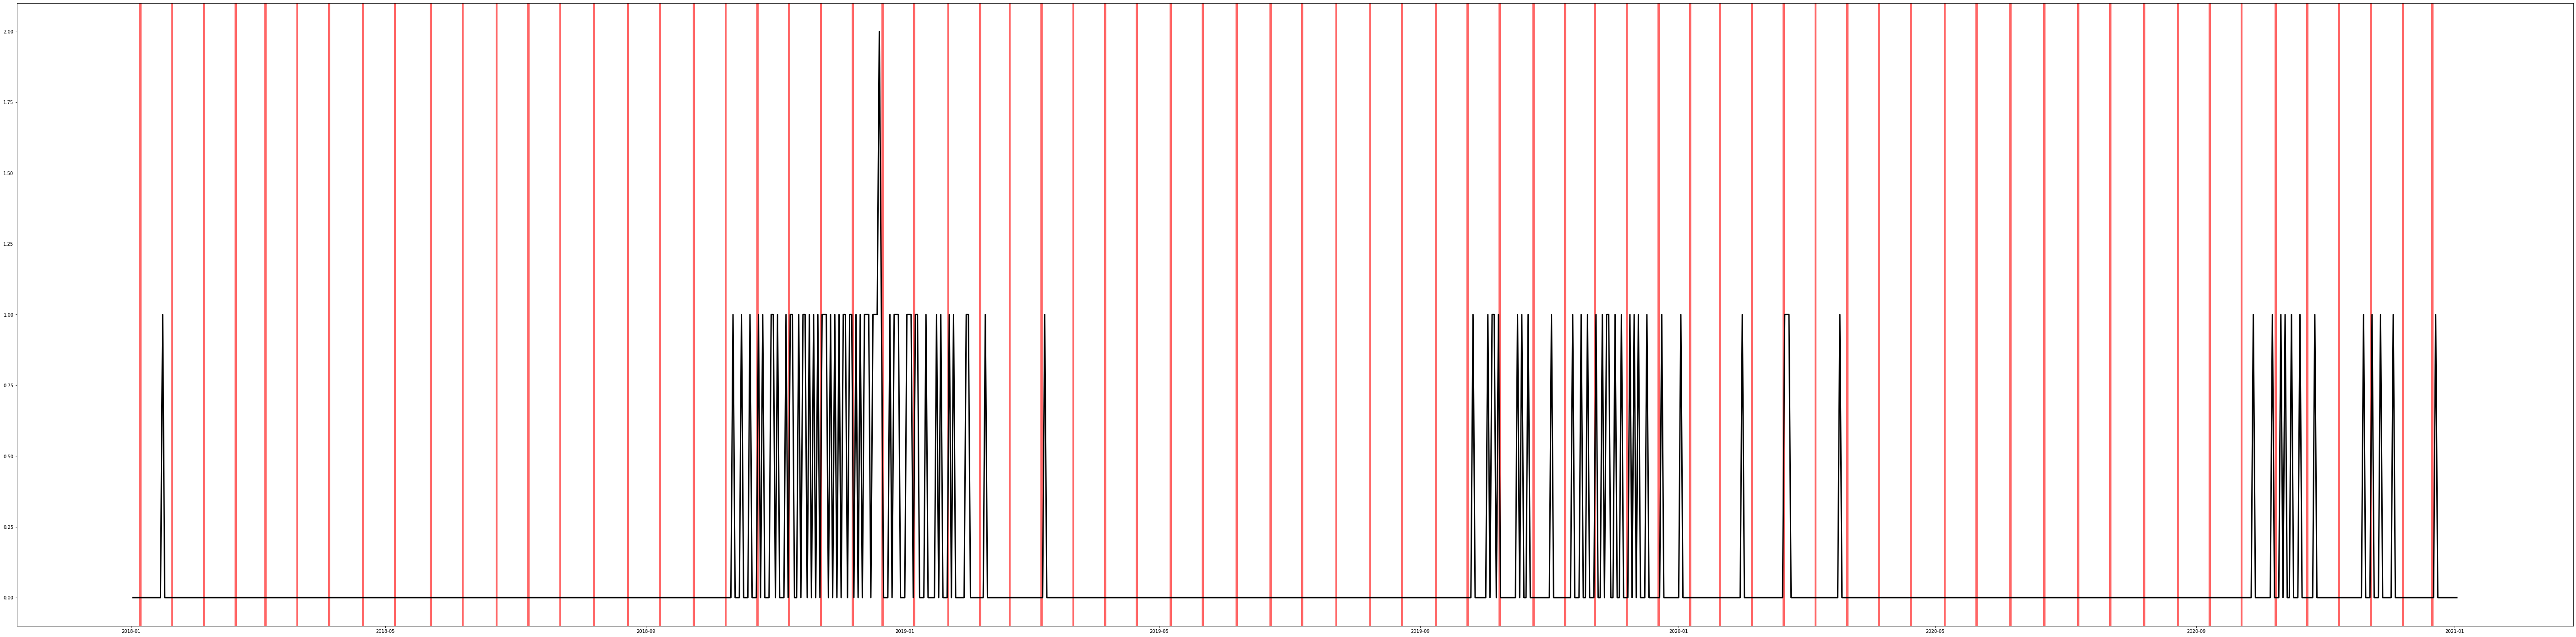

In [ ]:
tmp = nordataevent[nordataevent['종류'] == '농산물탈피기']

plt.subplots(figsize = (100,25))

plt.plot(tmp['date'], tmp['건수'], linewidth = 3, color = 'black')
# c = ['red','blue','gray','pink']
for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'red', alpha=0.6)

# for j in 
# for i in range(7, len(patches)): # 8번째부터 마지막 구간을
#     patches[i].set_facecolor('gold') 

plt.show()

# 로지스틱 모형

In [ ]:
# 북부사업소에 있는 모든 종류를 볼 게 아니고
# 일부만 볼 것임
# 그 일부만 선별 + 서부/농업에서도 일부만 선별해서 총합(일단 통과)
# 최종 데이터프레임만들고(일단 통과)
# 보유건수 열 붙여서
# ratio >= 1 이상이었던 date에 대해서 1
# ratio < 1 date에 대해서 0

In [ ]:
nordata = nor[(nor['종류'] == '콩정선기') | 
              (nor['종류'] == '농산물탈피기') | 
              (nor['종류'] == '모우어') | 
              (nor['종류'] == '보행경운기') | 
              (nor['종류'] == '잔가지파쇄기')]

nordata['종류'].nunique()

5

In [ ]:
norown = owncount[owncount['임대사업장'] == '북부분소']

norown2 = norown[(norown['기종'] == '콩정선기') | 
              (norown['기종'] == '농산물탈피기') | 
              (norown['기종'] == '모우어') | 
              (norown['기종'] == '보행경운기') | 
              (norown['기종'] == '잔가지파쇄기')].copy()

In [ ]:
norown2.rename(columns = {'기종' : '종류'}, inplace = True)

In [ ]:
nordata2 = pd.merge(nordata, norown2, on = '종류', how = 'inner')
nordata2['ratio'] = nordata2['건수'] / nordata2['보유수']
nordata2.head(3)

,Unnamed: 0,date,종류,건수,임대사업장,보유수,ratio
0,0,2018-01-02,농산물탈피기,0.0,북부분소,1,0.0
1,1,2018-01-03,농산물탈피기,0.0,북부분소,1,0.0
2,2,2018-01-04,농산물탈피기,0.0,북부분소,1,0.0


In [ ]:
nordata2['label'] = np.where(nordata2['ratio'] >= 1, 1, 0)
nordata2.head(1)

,Unnamed: 0,date,종류,건수,임대사업장,보유수,ratio,label
0,0,2018-01-02,농산물탈피기,0.0,북부분소,1,0.0,0


In [ ]:
nordataevent = pd.merge(nordata2, event, on = 'date', how = 'left')
# nordataevent['event'].value_counts()

In [ ]:
nordataevent.head(3)

,Unnamed: 0,date,종류,건수,임대사업장,보유수,ratio,label,event,date_str,year,month,day
0,0,2018-01-02,농산물탈피기,0.0,북부분소,1,0.0,0,NaN,NaN,NaN,NaN,NaN
1,1,2018-01-03,농산물탈피기,0.0,북부분소,1,0.0,0,NaN,NaN,NaN,NaN,NaN
2,2,2018-01-04,농산물탈피기,0.0,북부분소,1,0.0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
event.head()

,event,date,date_str,year,month,day
0,입춘,2018-02-04,2018-02-04,2018,2,4
1,우수,2018-02-19,2018-02-19,2018,2,19
2,영칩,2018-03-05,2018-03-05,2018,3,5
3,춘분,2018-03-20,2018-03-20,2018,3,20
4,청명,2018-04-04,2018-04-04,2018,4,4


In [ ]:
eventcol

['입춘',
 '우수',
 '영칩',
 '춘분',
 '청명',
 '곡우',
 '입하',
 '소만',
 '망종',
 '하지',
 '소서',
 '대서',
 '입추',
 '처서',
 '백로',
 '추분',
 '한로',
 '상강',
 '입동',
 '소설',
 '대설',
 '동지 ',
 '소한',
 '대한']

* event에 대한 딕셔너리

In [ ]:
eventcol = list(event['event'].unique())

for i in range(0,24) :
  nordataevent['var{}'.format(i)] = np.where(nordataevent['event'] == eventcol[i], 1, 0)

In [ ]:
nordataevent.head(1)

,Unnamed: 0,date,종류,건수,임대사업장,보유수,ratio,label,event,date_str,year,month,day,var1,var0,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23
0,0,2018-01-02,농산물탈피기,0.0,북부분소,1,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#딕셔너리 만들기
dic = {}
for i in range(0,24):
  dic['var{}'.format(i)] = eventcol[i]

In [ ]:
dic['var15']

'추분'

## 모형 적합

In [ ]:
#로지스틱 모형에 들어갈 x 변수
trainX = nordataevent[nordataevent.columns[13:]].copy()
trainy = nordataevent[['label']]

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# function = model.fit(trainX, trainy)
# # prediction = model.predict(test_X)
# # print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# function.summary() error

AttributeError: ignored

In [ ]:
nordataevent['종류'].unique()

array(['농산물탈피기', '모우어', '보행경운기', '잔가지파쇄기', '콩정선기'], dtype=object)

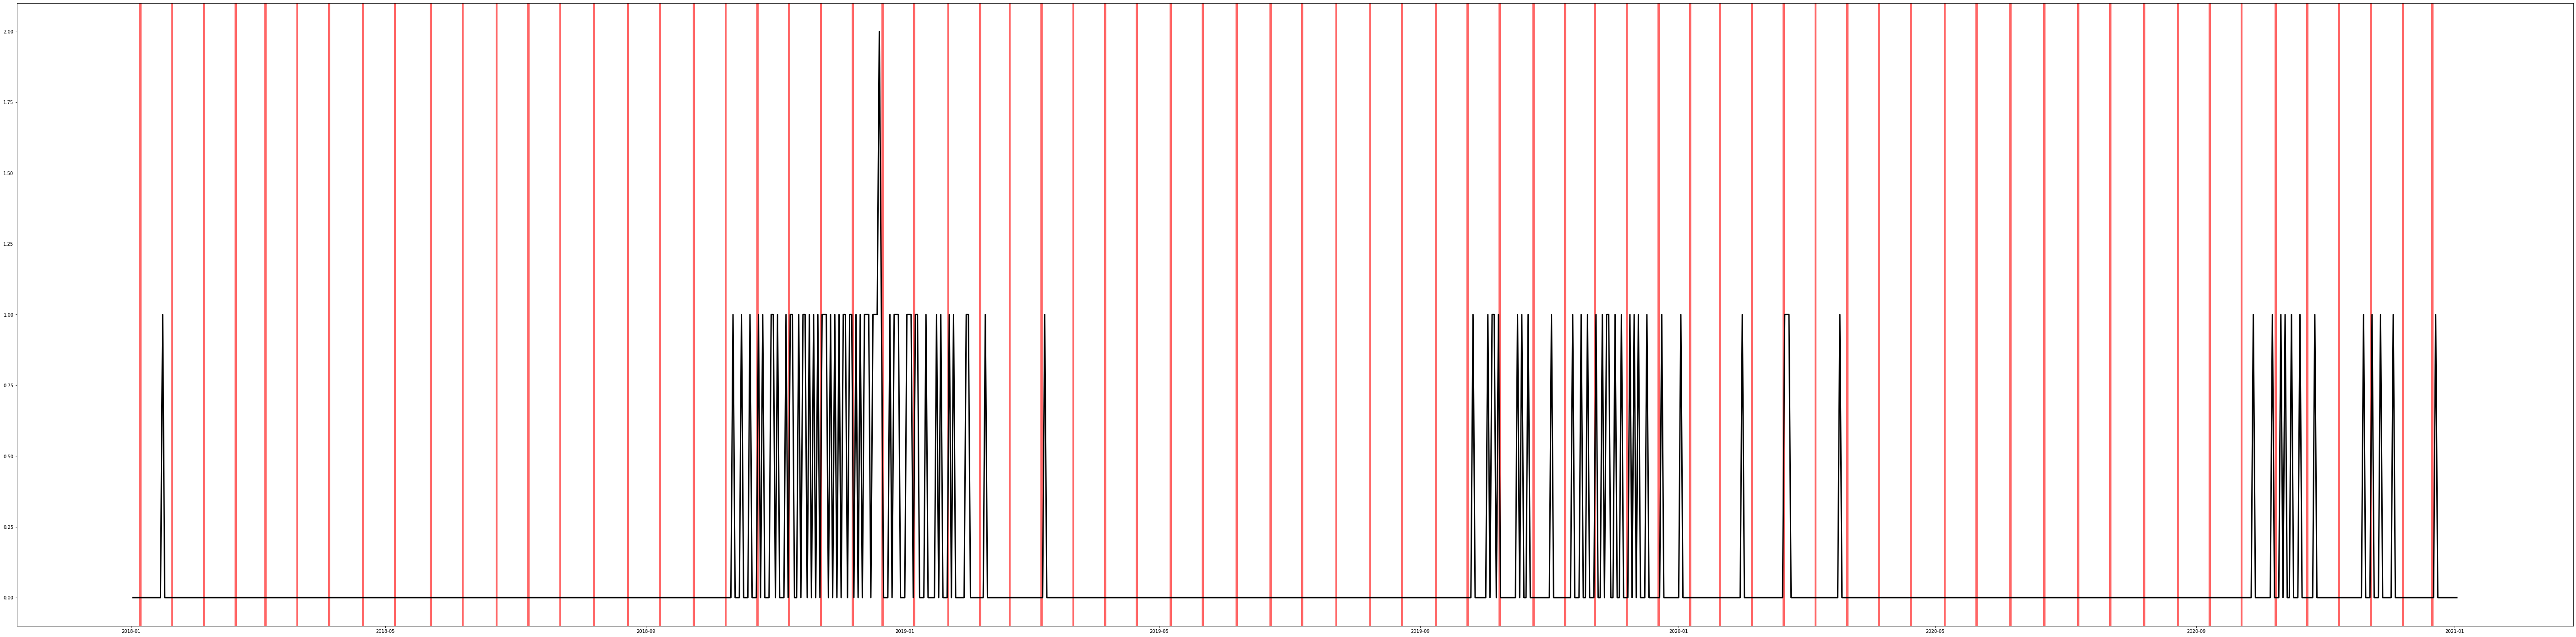

In [ ]:
tmp1 = nordataevent[nordataevent['종류'] == '농산물탈피기']

plt.subplots(figsize = (100,25))

plt.plot(tmp1['date'], tmp1['건수'], linewidth = 3, color = 'black')
# c = ['red','blue','gray','pink']
for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'red', alpha=0.6)


plt.show()

In [ ]:
import statsmodels.api as sm
logis1 = sm.Logit.from_formula('label ~  var15 + var16 + var17 + var18 + var19 + var23', tmp1).fit()
logis1.summary()

         Current function value: 0.296967
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1090
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                0.006380
Time:                        01:46:52   Log-Likelihood:                -325.77
converged:                      False   LL-Null:                       -327.86
Covariance Type:            nonrobust   LLR p-value:                    0.6518
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3263      0.107    -21.755      0.000      -2.536      -2.117
var15        -20.9656   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var16          1.6331      1.229      1.328      0.184      -0.776       4.043
var17        -20.9656   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var18        -20.9656   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var19        -20.9656   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var23        -20.9656   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
==============================================================================
"""

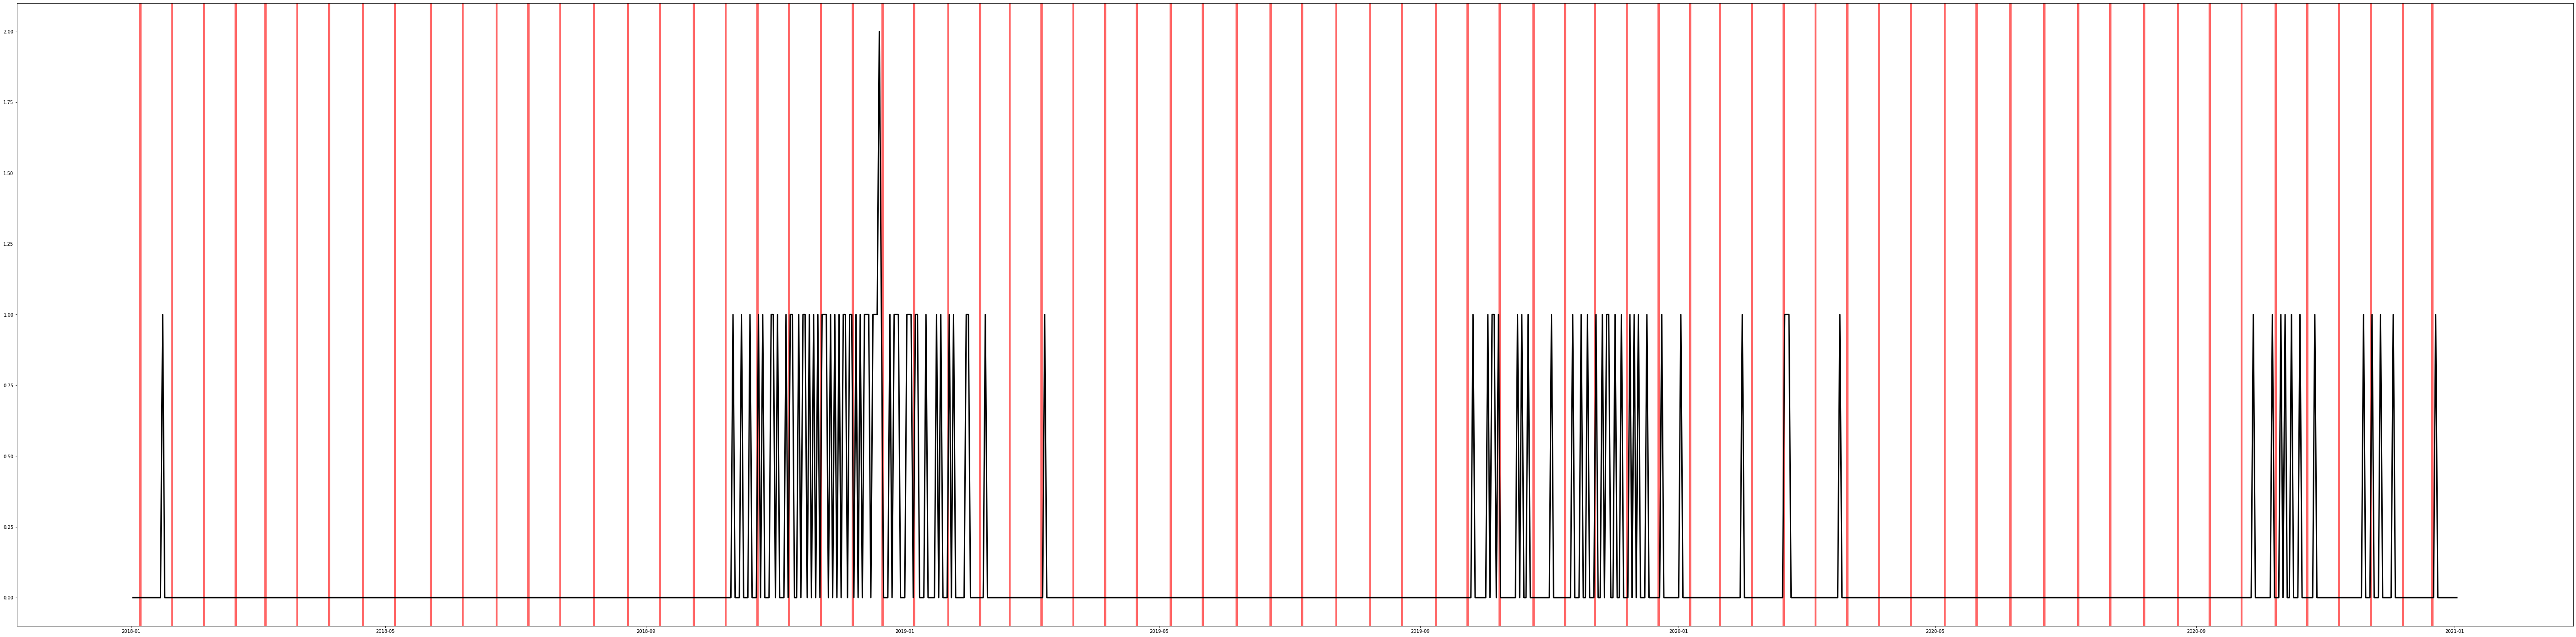

In [ ]:
## 데이터 개선 1번
tmp11 = temp[temp['종류'] == '농산물탈피기']

plt.subplots(figsize = (100,25))

plt.plot(tmp11['date'], tmp11['건수'], linewidth = 3, color = 'black')
# c = ['red','blue','gray','pink']
for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'red', alpha=0.6)

plt.show()

In [ ]:
# logis11 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp11).fit()
# logis11.summary()

         Current function value: 0.206152
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.3102
Time:                        06:54:17   Log-Likelihood:                -226.15
converged:                      False   LL-Null:                       -327.86
Covariance Type:            nonrobust   LLR p-value:                 2.264e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2133      0.922     -3.485      0.000      -5.020      -1.406
var0          -0.6326      1.302     -0.486      0.627      -3.185       1.920
var1           0.5984      1.099      0.544      0.586      -1.556       2.752
var2           0.1453      1.172      0.124      0.901      -2.152       2.442
var3         -21.3534   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
var4         -20.5937   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var5         -19.9134   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var6         -19.9134   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var7         -19.9134   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var8         -19.2007   1.06e+04     -0.002      0.999   -2.09e+04    2.08e+04
var9         -20.5937   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var10        -20.5937   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var11        -19.2007   1.06e+04     -0.002      0.999   -2.09e+04    2.08e+04
var12        -19.9134   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var13        -20.5937   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var14        -20.5937   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var15          1.3162      1.021      1.290      0.197      -0.684       3.317
var16          2.0559      0.985      2.088      0.037       0.126       3.986
var17          1.6818      1.001      1.680      0.093      -0.280       3.644
var18          2.2325      0.982      2.273      0.023       0.307       4.158
var19          2.8079      0.971      2.892      0.004       0.905       4.711
var20          2.4851      0.978      2.542      0.011       0.569       4.401
var21          2.4714      0.999      2.474      0.013       0.514       4.429
var22          1.7862      1.028      1.738      0.082      -0.229       3.801
var23          1.1063      1.018      1.086      0.277      -0.889       3.102
==============================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

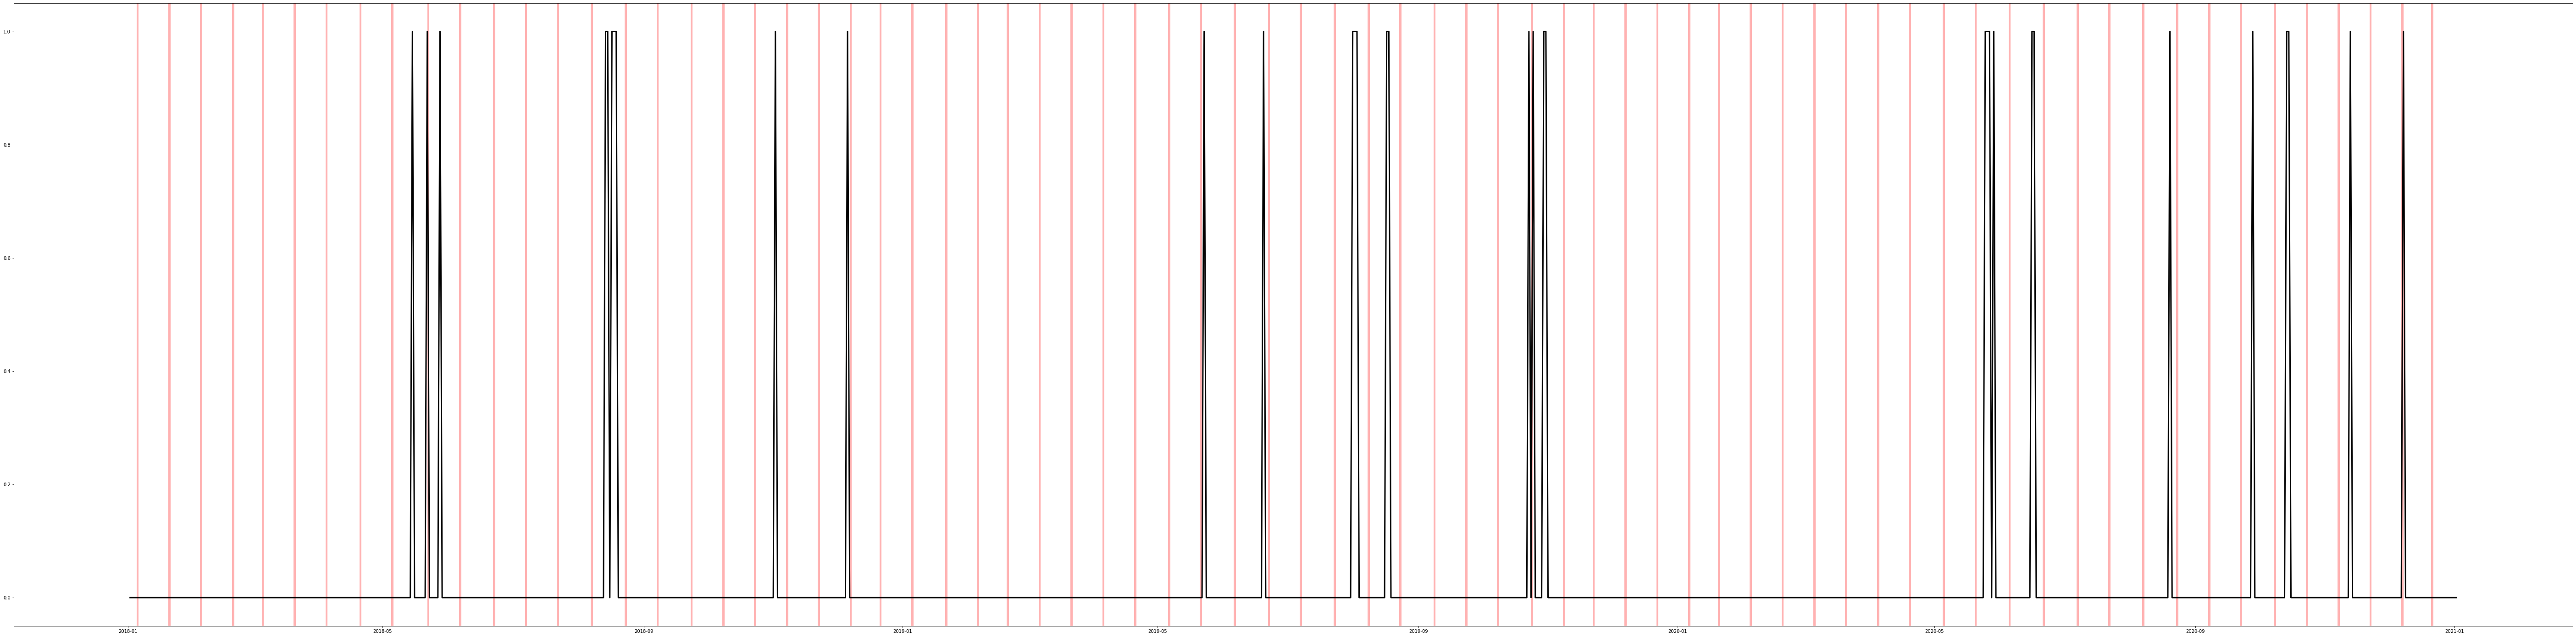

In [ ]:
tmp2 = nordataevent[nordataevent['종류'] == '모우어']

plt.subplots(figsize = (100,25))

plt.plot(tmp2['date'], tmp2['건수'], linewidth = 3, color = 'black')
# c = ['red','blue','gray','pink']
for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'red', alpha=0.3)

plt.show()

In [ ]:
logis2 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp2).fit()
logis2.summary()

         Current function value: 0.131577
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.02556
Time:                        01:09:21   Log-Likelihood:                -144.34
converged:                      False   LL-Null:                       -148.12
Covariance Type:            nonrobust   LLR p-value:                    0.9994
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4350      0.180    -19.126      0.000      -3.787      -3.083
var0         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var1         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var2         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var3         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var4         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var5         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var6         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var7           2.7418      1.238      2.215      0.027       0.316       5.168
var8         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var9         -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var10        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var11        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var12        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var13        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var14        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var15        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var16        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var17        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var18        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var19        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var20        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var21        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var22        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var23        -19.8560   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
==============================================================================
"""

In [ ]:
tmp2[tmp2['event'] == '소만'][['event','date','label']]
#1이상이었던 적이 도대체 언제야?

,event,date,label
1237,소만,2018-05-22,1
1601,소만,2019-05-21,0
1966,소만,2020-05-20,0


* 보행경운기

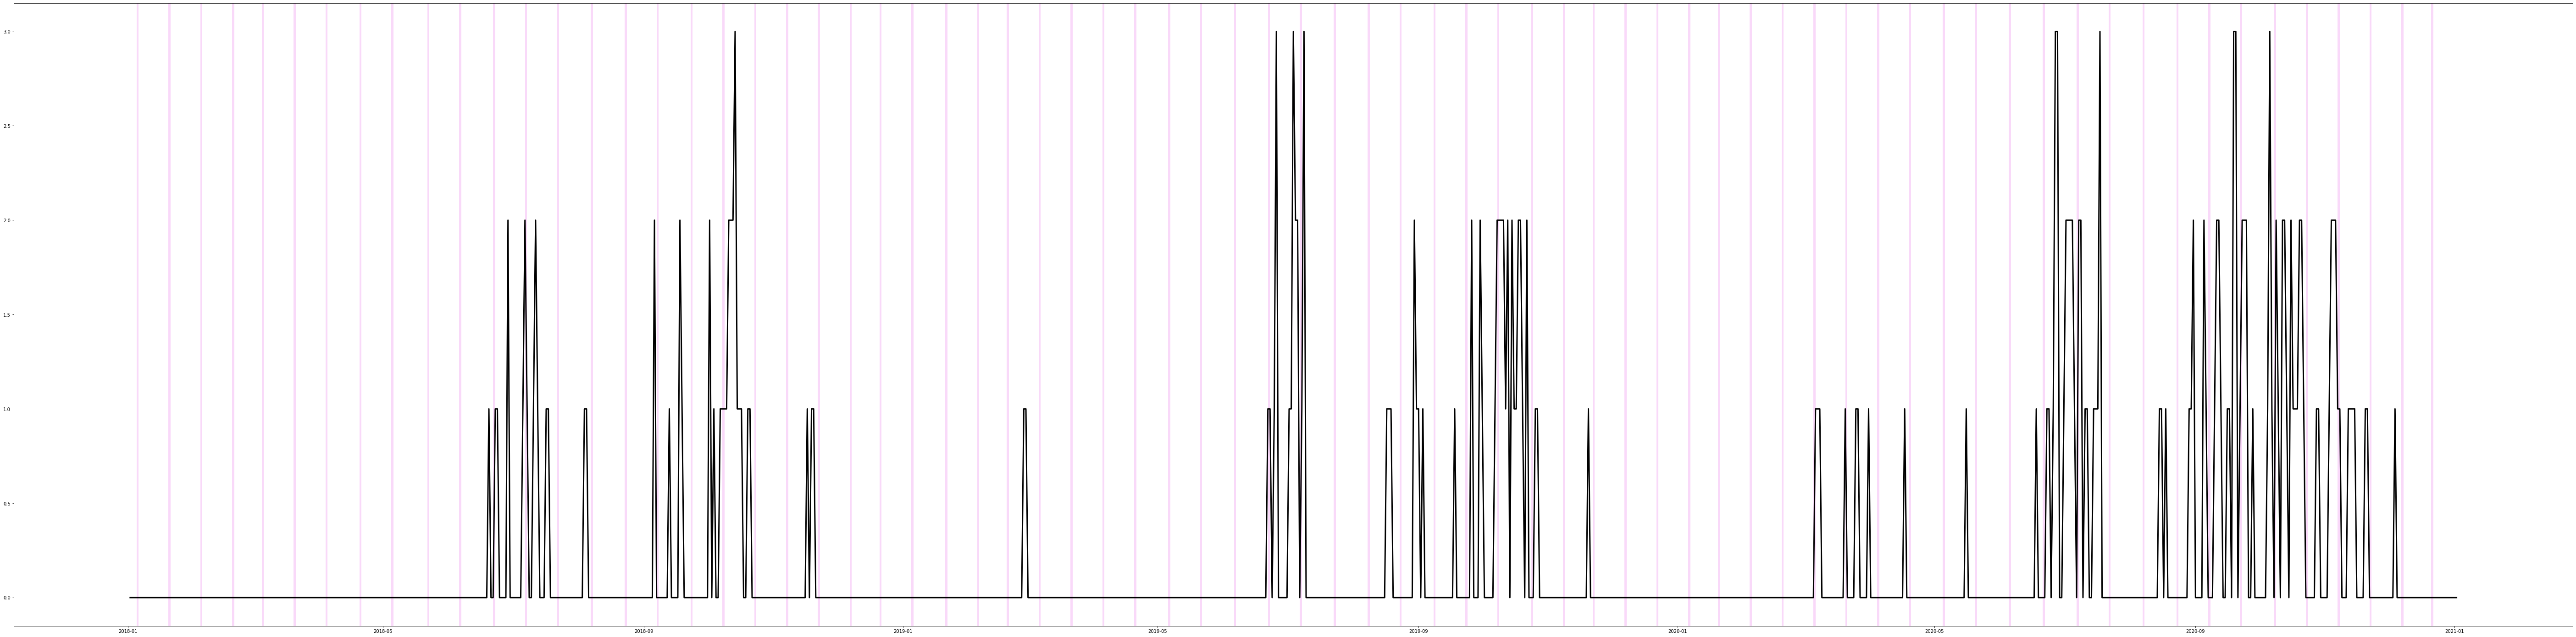

In [ ]:
tmp3 = nordataevent[nordataevent['종류'] ==  '보행경운기']

plt.subplots(figsize = (100,25))

plt.plot(tmp3['date'], tmp3['건수'], linewidth = 3, color = 'black')

for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'violet', alpha=0.5)

plt.show()

In [ ]:
logis3 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp3).fit()
logis3.summary()

         Current function value: 0.051276
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.01198
Time:                        01:16:26   Log-Likelihood:                -56.250
converged:                      False   LL-Null:                       -56.932
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6201      0.318    -14.538      0.000      -5.243      -3.997
var0         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var1         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var2         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var3         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var4         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var5         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var6         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var7         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var8         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var9         -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var10        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var11        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var12        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var13        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var14        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var15        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var16        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var17        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var18        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var19        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var20        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var21        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var22        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
var23        -18.6680   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
==============================================================================
"""

* 잔가지파쇄기 - var15 

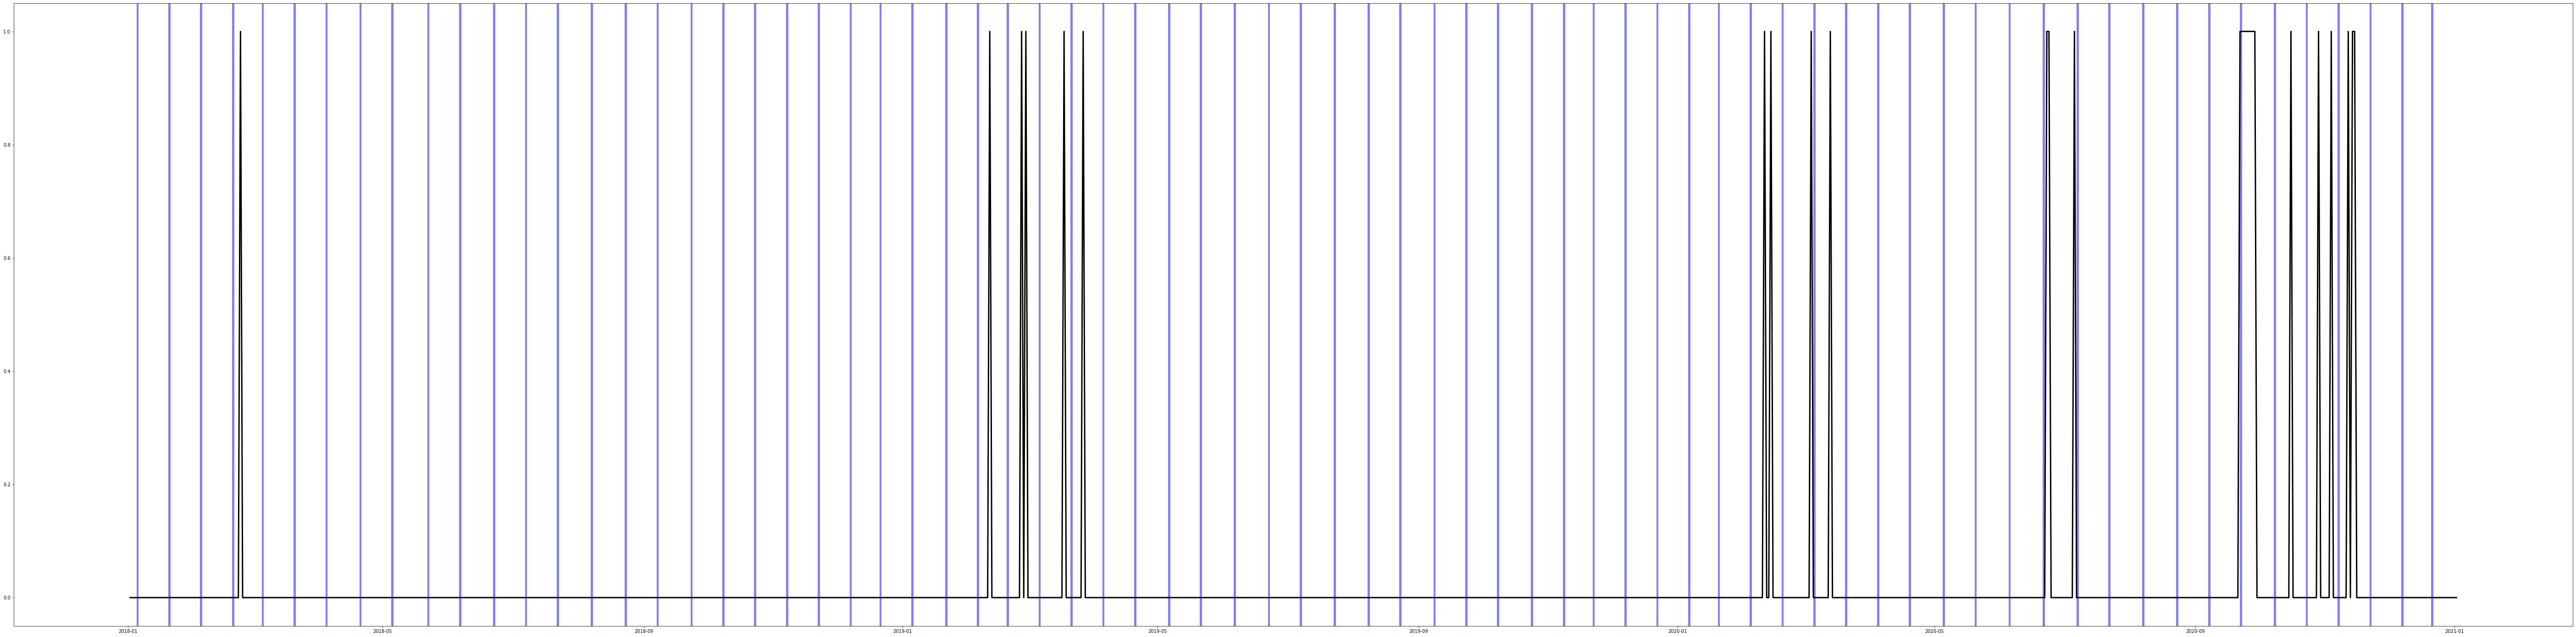

In [ ]:
tmp4 = nordataevent[nordataevent['종류'] ==  '잔가지파쇄기']

plt.subplots(figsize = (100,25))

plt.plot(tmp4['date'], tmp4['건수'], linewidth = 3, color = 'black')

for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'blue', alpha=0.5)

plt.show()

In [ ]:
logis4 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp4).fit()
logis4.summary()

         Current function value: 0.112224
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.02823
Time:                        01:17:35   Log-Likelihood:                -123.11
converged:                      False   LL-Null:                       -126.69
Covariance Type:            nonrobust   LLR p-value:                    0.9997
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6487      0.199    -18.367      0.000      -4.038      -3.259
var0         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var1         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var2         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var3         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var4         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var5         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var6         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var7         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var8         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var9         -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var10        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var11        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var12        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var13        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var14        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var15          2.9555      1.241      2.382      0.017       0.524       5.387
var16        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var17        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var18        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var19        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var20        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var21        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var22        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var23        -19.6421   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
==============================================================================
"""

In [ ]:
tmp4[tmp4['event'] == '추분'][['event','date','label']]

,event,date,label
3555,추분,2018-09-23,0
3920,추분,2019-09-23,0
4285,추분,2020-09-22,1


* 콩정선기

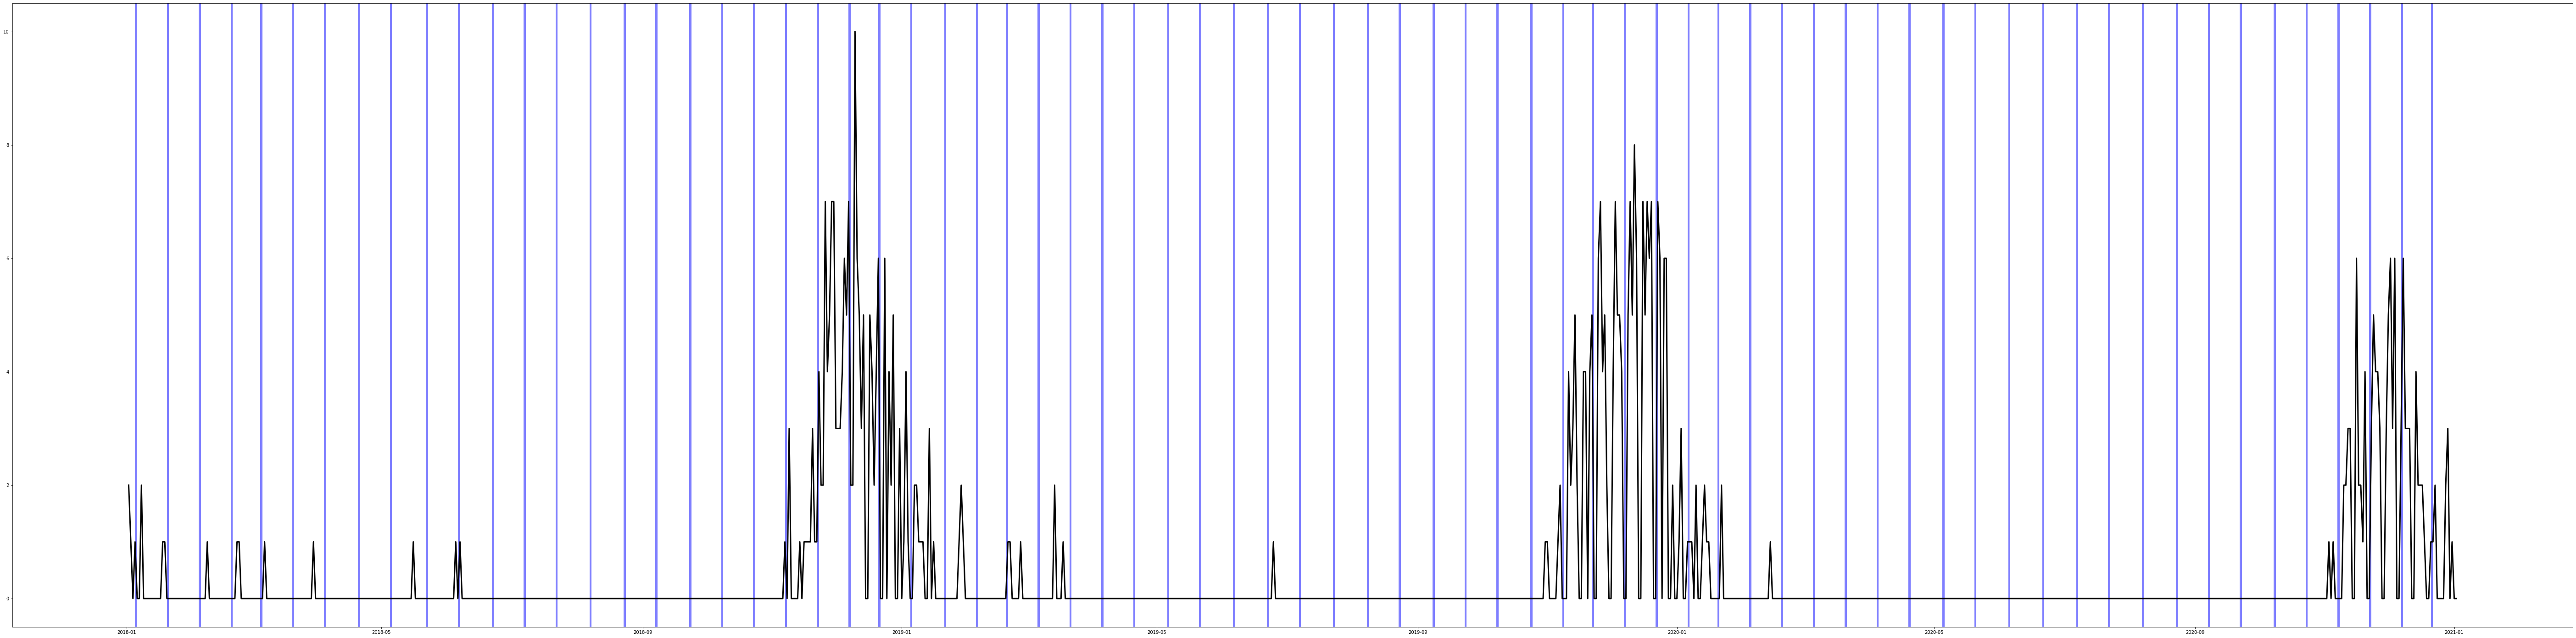

In [ ]:
tmp5 = nordataevent[nordataevent['종류'] ==  '콩정선기']

plt.subplots(figsize = (100,25))

plt.plot(tmp5['date'], tmp5['건수'], linewidth = 3, color = 'black')

for i in range(0,72):
    span_start = datetime(event['year'][i], event['month'][i], event['day'][i])
    span_end =  datetime(event['year'][i], event['month'][i], event['day'][i]+1)
    plt.axvspan(span_start, span_end,  facecolor = 'blue', alpha=0.5)

plt.show()

In [ ]:
logis5 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp5).fit()
logis5.summary()

         Current function value: 0.256691
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.03410
Time:                        01:24:39   Log-Likelihood:                -281.59
converged:                      False   LL-Null:                       -291.53
Covariance Type:            nonrobust   LLR p-value:                    0.7033
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4966      0.118    -21.194      0.000      -2.727      -2.266
var0         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var1         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var2         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var3         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var4         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var5         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var6         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var7         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var8         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var9         -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var10        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var11        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var12        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var13        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var14        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var15        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var16        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var17        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var18        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var19          1.8034      1.230      1.466      0.143      -0.608       4.215
var20          3.1897      1.230      2.592      0.010       0.778       5.601
var21          1.8034      1.230      1.466      0.143      -0.608       4.215
var22        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
var23        -20.7952   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
==============================================================================
"""

## 모형 개선
1. 다른 절기가 나올 때까지 var에 1을 넣는다
2. 시계열 개입모형으로 절기 자체가 수요에 영향을 주는지 유의미성 판단

In [ ]:
# 절기 24개 사이에 각각 1을 넣으려면 인덱스를 일단 추출?

In [ ]:
nordataevent.columns

Index(['Unnamed: 0', 'date', '종류', '건수', '임대사업장', '보유수', 'ratio', 'label',
       'event', 'date_str', 'year', 'month', 'day', 'var0', 'var1', 'var2',
       'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23'],
      dtype='object')

In [ ]:
nordataevent = nordataevent[['date', '종류', '건수','보유수', 'ratio', 'label','event',
              'var0', 'var1', 'var2','var3', 'var4', 'var5', 'var6', 'var7',
              'var8', 'var9', 'var10','var11', 'var12', 'var13', 'var14', 'var15',
              'var16', 'var17', 'var18','var19', 'var20', 'var21', 'var22', 'var23']]
nordataevent.head(3)

,date,종류,건수,보유수,ratio,label,event,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23
0,2018-01-02,농산물탈피기,0.0,1,0.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-03,농산물탈피기,0.0,1,0.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-04,농산물탈피기,0.0,1,0.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# nordataevent > tmp1, tmp2, tmp3, ,,

In [ ]:
for i in range(0,24):
  print(i, dic['var{}'.format(i)], ":", tmp1[tmp1['event'] == dic['var{}'.format(i)]].index)

0 입춘 : Int64Index([33, 399, 763], dtype='int64')
1 우수 : Int64Index([48, 413, 778], dtype='int64')
2 영칩 : Int64Index([62, 428, 793], dtype='int64')
3 춘분 : Int64Index([77, 443, 808], dtype='int64')
4 청명 : Int64Index([92, 458, 823], dtype='int64')
5 곡우 : Int64Index([108, 473, 838], dtype='int64')
6 입하 : Int64Index([123, 489, 854], dtype='int64')
7 소만 : Int64Index([140, 504, 869], dtype='int64')
8 망종 : Int64Index([155, 520, 885], dtype='int64')
9 하지 : Int64Index([171, 536, 901], dtype='int64')
10 소서 : Int64Index([186, 551, 917], dtype='int64')
11 대서 : Int64Index([201, 567, 932], dtype='int64')
12 입추 : Int64Index([217, 583, 948], dtype='int64')
13 처서 : Int64Index([233, 598, 964], dtype='int64')
14 백로 : Int64Index([248, 614, 979], dtype='int64')
15 추분 : Int64Index([264, 629, 994], dtype='int64')
16 한로 : Int64Index([279, 644, 1010], dtype='int64')
17 상강 : Int64Index([294, 660, 1025], dtype='int64')
18 입동 : Int64Index([309, 675, 1040], dtype='int64')
19 소설 : Int64Index([324, 689, 1055], dtype=

In [ ]:
b = []
for j in range(0,3):
  for i in range(0,24):
    b.append(tmp1[tmp1['event'] == dic['var{}'.format(i)]].index[j])
b

In [ ]:
# tmp1.at[3:17,'var22'] = 1
# tmp1.at[18:32, 'var23'] = 1
# tmp1.at[33:47, 'var0'] = 1
# tmp1.at[48:61, 'var1'] = 1
# tmp1.at[62:76, 'var2'] = 1
# tmp1.at[77:91, 'var3'] = 1
# tmp1.at[92:107, 'var4'] = 1
# tmp1.at[108:122, 'var5'] = 1
# tmp1.at[123:139, 'var6'] = 1
# tmp1.at[140:154, 'var7'] = 1
# tmp1.at[155:170, 'var8'] = 1
# tmp1.at[171:185, 'var9'] = 1
# tmp1.at[186:200, 'var10'] = 1
# tmp1.at[201:216, 'var11'] = 1
# tmp1.at[217:232, 'var12'] = 1
# tmp1.at[233:247, 'var13'] = 1
# tmp1.at[248:263, 'var14'] = 1
# tmp1.at[264:278, 'var15'] = 1
# tmp1.at[279:293, 'var16'] = 1
# tmp1.at[294:308, 'var17'] = 1
# tmp1.at[309:323, 'var18'] = 1
# tmp1.at[324:338, 'var19'] = 1
# tmp1.at[339:352, 'var20'] = 1
# tmp1.at[353:367, 'var21'] = 1 #동지는 내년으로 넘어가기 유의!

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
a = [22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 8, 10,
     11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [ ]:
print(b,'\n',a)

[33, 48, 62, 77, 92, 108, 123, 140, 155, 171, 186, 201, 217, 233, 248, 264, 279, 294, 309, 324, 339, 353, 3, 18, 399, 413, 428, 443, 458, 473, 489, 504, 520, 536, 551, 567, 583, 598, 614, 629, 644, 660, 675, 689, 704, 719, 368, 384, 763, 778, 793, 808, 823, 838, 854, 869, 885, 901, 917, 932, 948, 964, 979, 994, 1010, 1025, 1040, 1055, 1070, 1084, 734, 748] 
 [22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
tmp1 = tmp1[['date', '종류', '건수', '임대사업장', '보유수', 'ratio', 'label','event',
             'var0', 'var1', 'var2','var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23']]

In [ ]:
for i in range(0,21):
  tmp1.at[b[i]:b[i+1]-1, 'var{}'.format(i)] = 1

for i in range(24,45):
  tmp1.at[b[i]:b[i+1]-1, 'var{}'.format(i-24)] = 1

for i in range(48,69):
  tmp1.at[b[i]:b[i+1]-1, 'var{}'.format(i-48)] = 1


tmp1.at[3:17, 'var22'] = 1
tmp1.at[18:32, 'var23'] = 1

tmp1.at[353:367, 'var21'] = 1
tmp1.at[368:383, 'var22'] = 1
tmp1.at[384:398, 'var23'] = 1

tmp1.at[719:733, 'var21'] = 1
tmp1.at[734:747, 'var22'] = 1
tmp1.at[748:762, 'var23'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
nordataevent.columns

Index(['date', '종류', '건수', '보유수', 'ratio', 'label', 'event', 'var0', 'var1',
       'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23'],
      dtype='object')

In [ ]:
tmp2 = nordataevent[nordataevent['종류'] == '모우어']
tmp3 = nordataevent[nordataevent['종류'] ==  '보행경운기']
tmp4 = nordataevent[nordataevent['종류'] ==  '잔가지파쇄기']
tmp5 = nordataevent[nordataevent['종류'] ==  '콩정선기']

In [ ]:
b2 = []
for j in range(0,3):
  for i in range(0,24):
    b2.append(tmp2[tmp2['event'] == dic['var{}'.format(i)]].index[j])

In [ ]:
for i in range(0,24):
  print(i, dic['var{}'.format(i)], ":", tmp2[tmp2['event'] == dic['var{}'.format(i)]].index)

0 입춘 : Int64Index([1130, 1496, 1860], dtype='int64')
1 우수 : Int64Index([1145, 1510, 1875], dtype='int64')
2 영칩 : Int64Index([1159, 1525, 1890], dtype='int64')
3 춘분 : Int64Index([1174, 1540, 1905], dtype='int64')
4 청명 : Int64Index([1189, 1555, 1920], dtype='int64')
5 곡우 : Int64Index([1205, 1570, 1935], dtype='int64')
6 입하 : Int64Index([1220, 1586, 1951], dtype='int64')
7 소만 : Int64Index([1237, 1601, 1966], dtype='int64')
8 망종 : Int64Index([1252, 1617, 1982], dtype='int64')
9 하지 : Int64Index([1268, 1633, 1998], dtype='int64')
10 소서 : Int64Index([1283, 1648, 2014], dtype='int64')
11 대서 : Int64Index([1298, 1664, 2029], dtype='int64')
12 입추 : Int64Index([1314, 1680, 2045], dtype='int64')
13 처서 : Int64Index([1330, 1695, 2061], dtype='int64')
14 백로 : Int64Index([1345, 1711, 2076], dtype='int64')
15 추분 : Int64Index([1361, 1726, 2091], dtype='int64')
16 한로 : Int64Index([1376, 1741, 2107], dtype='int64')
17 상강 : Int64Index([1391, 1757, 2122], dtype='int64')
18 입동 : Int64Index([1406, 1772, 2137],

In [ ]:
for i in range(0,21):
  tmp2.at[b2[i]:b2[i+1]-1, 'var{}'.format(i)] = 1

for i in range(24,45):
  tmp2.at[b2[i]:b2[i+1]-1, 'var{}'.format(i-24)] = 1

for i in range(48,69):
  tmp2.at[b2[i]:b2[i+1]-1, 'var{}'.format(i-48)] = 1

tmp2.at[1100:1114, 'var22'] = 1
tmp2.at[1115:1129, 'var23'] = 1
tmp2.at[1450:1464, 'var21'] = 1

tmp2.at[1465:1480, 'var22'] = 1
tmp2.at[1481:1495, 'var23'] = 1
tmp2.at[1816:1830, 'var21'] = 1

tmp2.at[1831:1844, 'var22'] = 1
tmp2.at[1845:1859, 'var23'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
b3 = []
for j in range(0,3):
  for i in range(0,24):
    b3.append(tmp3[tmp3['event'] == dic['var{}'.format(i)]].index[j])

In [ ]:
for i in range(0,24):
  print(i, dic['var{}'.format(i)], ":", tmp3[tmp3['event'] == dic['var{}'.format(i)]].index)

0 입춘 : Int64Index([2227, 2593, 2957], dtype='int64')
1 우수 : Int64Index([2242, 2607, 2972], dtype='int64')
2 영칩 : Int64Index([2256, 2622, 2987], dtype='int64')
3 춘분 : Int64Index([2271, 2637, 3002], dtype='int64')
4 청명 : Int64Index([2286, 2652, 3017], dtype='int64')
5 곡우 : Int64Index([2302, 2667, 3032], dtype='int64')
6 입하 : Int64Index([2317, 2683, 3048], dtype='int64')
7 소만 : Int64Index([2334, 2698, 3063], dtype='int64')
8 망종 : Int64Index([2349, 2714, 3079], dtype='int64')
9 하지 : Int64Index([2365, 2730, 3095], dtype='int64')
10 소서 : Int64Index([2380, 2745, 3111], dtype='int64')
11 대서 : Int64Index([2395, 2761, 3126], dtype='int64')
12 입추 : Int64Index([2411, 2777, 3142], dtype='int64')
13 처서 : Int64Index([2427, 2792, 3158], dtype='int64')
14 백로 : Int64Index([2442, 2808, 3173], dtype='int64')
15 추분 : Int64Index([2458, 2823, 3188], dtype='int64')
16 한로 : Int64Index([2473, 2838, 3204], dtype='int64')
17 상강 : Int64Index([2488, 2854, 3219], dtype='int64')
18 입동 : Int64Index([2503, 2869, 3234],

In [ ]:
for i in range(0,21):
  tmp3.at[b3[i]:b3[i+1]-1, 'var{}'.format(i)] = 1

for i in range(24,45):
  tmp3.at[b3[i]:b3[i+1]-1, 'var{}'.format(i-24)] = 1

for i in range(48,69):
  tmp3.at[b3[i]:b3[i+1]-1, 'var{}'.format(i-48)] = 1

tmp3.at[2197:2211, 'var22'] = 1
tmp3.at[2212:2226, 'var23'] = 1
tmp3.at[2547:2561, 'var21'] = 1

tmp3.at[2562:2577, 'var22'] = 1
tmp3.at[2578:2592, 'var23'] = 1
tmp3.at[2913:2927, 'var21'] = 1

tmp3.at[2928:2941, 'var22'] = 1
tmp3.at[2942:2956, 'var23'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
b4 = []
for j in range(0,3):
  for i in range(0,24):
    b4.append(tmp4[tmp4['event'] == dic['var{}'.format(i)]].index[j])

In [ ]:
for i in range(0,24):
  print(i, dic['var{}'.format(i)], ":", tmp4[tmp4['event'] == dic['var{}'.format(i)]].index)

0 입춘 : Int64Index([3324, 3690, 4054], dtype='int64')
1 우수 : Int64Index([3339, 3704, 4069], dtype='int64')
2 영칩 : Int64Index([3353, 3719, 4084], dtype='int64')
3 춘분 : Int64Index([3368, 3734, 4099], dtype='int64')
4 청명 : Int64Index([3383, 3749, 4114], dtype='int64')
5 곡우 : Int64Index([3399, 3764, 4129], dtype='int64')
6 입하 : Int64Index([3414, 3780, 4145], dtype='int64')
7 소만 : Int64Index([3431, 3795, 4160], dtype='int64')
8 망종 : Int64Index([3446, 3811, 4176], dtype='int64')
9 하지 : Int64Index([3462, 3827, 4192], dtype='int64')
10 소서 : Int64Index([3477, 3842, 4208], dtype='int64')
11 대서 : Int64Index([3492, 3858, 4223], dtype='int64')
12 입추 : Int64Index([3508, 3874, 4239], dtype='int64')
13 처서 : Int64Index([3524, 3889, 4255], dtype='int64')
14 백로 : Int64Index([3539, 3905, 4270], dtype='int64')
15 추분 : Int64Index([3555, 3920, 4285], dtype='int64')
16 한로 : Int64Index([3570, 3935, 4301], dtype='int64')
17 상강 : Int64Index([3585, 3951, 4316], dtype='int64')
18 입동 : Int64Index([3600, 3966, 4331],

In [ ]:
for i in range(0,21):
  tmp4.at[b4[i]:b4[i+1]-1, 'var{}'.format(i)] = 1

for i in range(24,45):
  tmp4.at[b4[i]:b4[i+1]-1, 'var{}'.format(i-24)] = 1

for i in range(48,69):
  tmp4.at[b4[i]:b4[i+1]-1, 'var{}'.format(i-48)] = 1

tmp4.at[3294:3308, 'var22'] = 1
tmp4.at[3309:3323, 'var23'] = 1
tmp4.at[3644:3658, 'var21'] = 1

tmp4.at[3659:3674, 'var22'] = 1
tmp4.at[3675:3690, 'var23'] = 1
tmp4.at[4010:4024, 'var21'] = 1

tmp4.at[4025:4038, 'var22'] = 1
tmp4.at[4039:4053, 'var23'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
b5 = []
for j in range(0,3):
  for i in range(0,24):
    b5.append(tmp5[tmp5['event'] == dic['var{}'.format(i)]].index[j])

In [ ]:
for i in range(0,24):
  print(i, dic['var{}'.format(i)], ":", tmp5[tmp5['event'] == dic['var{}'.format(i)]].index)

0 입춘 : Int64Index([4421, 4787, 5151], dtype='int64')
1 우수 : Int64Index([4436, 4801, 5166], dtype='int64')
2 영칩 : Int64Index([4450, 4816, 5181], dtype='int64')
3 춘분 : Int64Index([4465, 4831, 5196], dtype='int64')
4 청명 : Int64Index([4480, 4846, 5211], dtype='int64')
5 곡우 : Int64Index([4496, 4861, 5226], dtype='int64')
6 입하 : Int64Index([4511, 4877, 5242], dtype='int64')
7 소만 : Int64Index([4528, 4892, 5257], dtype='int64')
8 망종 : Int64Index([4543, 4908, 5273], dtype='int64')
9 하지 : Int64Index([4559, 4924, 5289], dtype='int64')
10 소서 : Int64Index([4574, 4939, 5305], dtype='int64')
11 대서 : Int64Index([4589, 4955, 5320], dtype='int64')
12 입추 : Int64Index([4605, 4971, 5336], dtype='int64')
13 처서 : Int64Index([4621, 4986, 5352], dtype='int64')
14 백로 : Int64Index([4636, 5002, 5367], dtype='int64')
15 추분 : Int64Index([4652, 5017, 5382], dtype='int64')
16 한로 : Int64Index([4667, 5032, 5398], dtype='int64')
17 상강 : Int64Index([4682, 5048, 5413], dtype='int64')
18 입동 : Int64Index([4697, 5063, 5428],

In [ ]:
for i in range(0,21):
  tmp5.at[b5[i]:b5[i+1]-1, 'var{}'.format(i)] = 1

for i in range(24,45):
  tmp5.at[b5[i]:b5[i+1]-1, 'var{}'.format(i-24)] = 1

for i in range(48,69):
  tmp5.at[b5[i]:b5[i+1]-1, 'var{}'.format(i-48)] = 1

tmp5.at[4391:4405, 'var22'] = 1
tmp5.at[4406:4420, 'var23'] = 1
tmp5.at[4741:4755, 'var21'] = 1

tmp5.at[4756:4771, 'var22'] = 1
tmp5.at[4772:4786, 'var23'] = 1
tmp5.at[5107:5121, 'var21'] = 1

tmp5.at[5122:5135, 'var22'] = 1
tmp5.at[5136:5150, 'var23'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# tmp1.to_csv('/content/drive/MyDrive/공빅데-농기계/tmp1.csv', encoding = 'euc-kr')
# tmp2.to_csv('/content/drive/MyDrive/공빅데-농기계/tmp2.csv', encoding = 'euc-kr')
# tmp3.to_csv('/content/drive/MyDrive/공빅데-농기계/tmp3.csv', encoding = 'euc-kr')
# tmp4.to_csv('/content/drive/MyDrive/공빅데-농기계/tmp4.csv', encoding = 'euc-kr')
# tmp5.to_csv('/content/drive/MyDrive/공빅데-농기계/tmp5.csv', encoding = 'euc-kr')

In [ ]:
import statsmodels.api as sm

In [ ]:
logis11 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp1).fit()
logis11.summary()

         Current function value: 0.207700
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.3051
Time:                        08:42:59   Log-Likelihood:                -227.85
converged:                      False   LL-Null:                       -327.86
Covariance Type:            nonrobust   LLR p-value:                 1.030e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5664      0.973     -2.637      0.008      -4.474      -0.659
var0          -1.2215      1.359     -0.899      0.369      -3.885       1.442
var1          -0.0486      1.142     -0.043      0.966      -2.288       2.190
var2          -0.5017      1.213     -0.414      0.679      -2.878       1.875
var3         -22.0003   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
var4         -21.2406   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var5         -20.5604   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var6         -20.5604   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var7         -20.5604   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var8         -19.8476   1.06e+04     -0.002      0.999   -2.09e+04    2.08e+04
var9         -21.2406   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var10        -21.2406   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var11        -19.8476   1.06e+04     -0.002      0.999   -2.09e+04    2.08e+04
var12        -20.5604   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var13        -21.2406   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var14        -21.2406   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var15          0.6693      1.067      0.627      0.531      -1.422       2.761
var16          1.4089      1.033      1.364      0.173      -0.615       3.433
var17          1.0349      1.048      0.987      0.324      -1.020       3.090
var18          1.5856      1.030      1.539      0.124      -0.434       3.605
var19          2.1609      1.020      2.119      0.034       0.162       4.160
var20          1.8381      1.026      1.791      0.073      -0.173       3.850
var21          1.8244      1.046      1.744      0.081      -0.226       3.875
var22          0.6946      1.068      0.651      0.515      -1.398       2.787
var23          0.4711      1.070      0.440      0.660      -1.626       2.569
==============================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
logis22 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp2).fit()
logis22.summary()

         Current function value: 0.102306
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.2423
Time:                        08:43:23   Log-Likelihood:                -112.23
converged:                      False   LL-Null:                       -148.12
Covariance Type:            nonrobust   LLR p-value:                 1.167e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.1700   7.88e+06  -5.48e-06      1.000   -1.54e+07    1.54e+07
var0          12.9661    7.9e+06   1.64e-06      1.000   -1.55e+07    1.55e+07
var1          12.9661    7.9e+06   1.64e-06      1.000   -1.55e+07    1.55e+07
var2          12.6325   7.91e+06    1.6e-06      1.000   -1.55e+07    1.55e+07
var3          12.6325   7.91e+06    1.6e-06      1.000   -1.55e+07    1.55e+07
var4          12.2735   7.92e+06   1.55e-06      1.000   -1.55e+07    1.55e+07
var5          11.8864   7.93e+06    1.5e-06      1.000   -1.56e+07    1.56e+07
var6          39.3414   7.88e+06   4.99e-06      1.000   -1.54e+07    1.54e+07
var7          41.4271   7.88e+06   5.26e-06      1.000   -1.54e+07    1.54e+07
var8          40.4620   7.88e+06   5.13e-06      1.000   -1.54e+07    1.54e+07
var9          12.2735   7.92e+06   1.55e-06      1.000   -1.55e+07    1.55e+07
var10         12.2735   7.92e+06   1.55e-06      1.000   -1.55e+07    1.55e+07
var11         40.4620   7.88e+06   5.13e-06      1.000   -1.54e+07    1.54e+07
var12         41.5859   7.88e+06   5.28e-06      1.000   -1.54e+07    1.54e+07
var13         12.2735   7.92e+06   1.55e-06      1.000   -1.55e+07    1.55e+07
var14         12.2735   7.92e+06   1.55e-06      1.000   -1.55e+07    1.55e+07
var15         39.3634   7.88e+06   4.99e-06      1.000   -1.54e+07    1.54e+07
var16         40.5075   7.88e+06   5.14e-06      1.000   -1.54e+07    1.54e+07
var17         40.8428   7.88e+06   5.18e-06      1.000   -1.54e+07    1.54e+07
var18         39.4088   7.88e+06      5e-06      1.000   -1.54e+07    1.54e+07
var19         39.3859   7.88e+06      5e-06      1.000   -1.54e+07    1.54e+07
var20         39.4324   7.88e+06      5e-06      1.000   -1.54e+07    1.54e+07
var21         15.7450   7.88e+06      2e-06      1.000   -1.55e+07    1.55e+07
var22         12.6325   7.91e+06    1.6e-06      1.000   -1.55e+07    1.55e+07
var23         12.6325   7.91e+06    1.6e-06      1.000   -1.55e+07    1.55e+07
==============================================================================

Possibly complete quasi-separation: A fraction 0.54 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
logis33 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp3).fit()
logis33.summary()

         Current function value: 0.036171
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.3030
Time:                        08:43:42   Log-Likelihood:                -39.679
converged:                      False   LL-Null:                       -56.932
Covariance Type:            nonrobust   LLR p-value:                   0.07609
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.6939   1.94e+06  -1.63e-05      1.000    -3.8e+06     3.8e+06
var0          -3.8682   8.19e+06  -4.73e-07      1.000    -1.6e+07     1.6e+07
var1          -3.8682   8.19e+06  -4.73e-07      1.000    -1.6e+07     1.6e+07
var2          -4.1035   9.06e+06  -4.53e-07      1.000   -1.77e+07    1.77e+07
var3          -4.1035   9.06e+06  -4.53e-07      1.000   -1.77e+07    1.77e+07
var4          -4.1367    9.1e+06  -4.54e-07      1.000   -1.78e+07    1.78e+07
var5          -3.9633    8.3e+06  -4.78e-07      1.000   -1.63e+07    1.63e+07
var6          -3.9633    8.3e+06  -4.78e-07      1.000   -1.63e+07    1.63e+07
var7          -3.9633    8.3e+06  -4.78e-07      1.000   -1.63e+07    1.63e+07
var8          -3.5310   6.72e+06  -5.26e-07      1.000   -1.32e+07    1.32e+07
var9          29.3426   1.94e+06   1.51e-05      1.000    -3.8e+06     3.8e+06
var10         28.6029   1.94e+06   1.47e-05      1.000    -3.8e+06     3.8e+06
var11         -3.5310   6.72e+06  -5.26e-07      1.000   -1.32e+07    1.32e+07
var12         -3.9633    8.3e+06  -4.78e-07      1.000   -1.63e+07    1.63e+07
var13         -4.1367    9.1e+06  -4.54e-07      1.000   -1.78e+07    1.78e+07
var14         28.6029   1.94e+06   1.47e-05      1.000    -3.8e+06     3.8e+06
var15         27.8873   1.94e+06   1.44e-05      1.000    -3.8e+06     3.8e+06
var16         27.8873   1.94e+06   1.44e-05      1.000    -3.8e+06     3.8e+06
var17         -4.1035   9.06e+06  -4.53e-07      1.000   -1.77e+07    1.77e+07
var18         -3.8682   8.19e+06  -4.73e-07      1.000    -1.6e+07     1.6e+07
var19         -4.1035   9.06e+06  -4.53e-07      1.000   -1.77e+07    1.77e+07
var20         -3.3900   6.62e+06  -5.12e-07      1.000    -1.3e+07     1.3e+07
var21         12.6249   1.94e+06   6.51e-06      1.000    -3.8e+06     3.8e+06
var22         -4.1035   9.06e+06  -4.53e-07      1.000   -1.77e+07    1.77e+07
var23         -4.1035   9.06e+06  -4.53e-07      1.000   -1.77e+07    1.77e+07
==============================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
tmp4 = pd.read_csv('/content/drive/MyDrive/공빅데-농기계/tmp4.csv', encoding = 'euc-kr')
tmp5 = pd.read_csv('/content/drive/MyDrive/공빅데-농기계/tmp5.csv', encoding = 'euc-kr')

In [ ]:
logis44 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp4).fit()
logis44.summary()

         Current function value: 0.085285
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.2615
Time:                        13:17:37   Log-Likelihood:                -93.557
converged:                      False   LL-Null:                       -126.69
Covariance Type:            nonrobust   LLR p-value:                 7.944e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.4147   2574.305     -0.007      0.994   -5063.960    5027.131
var0          15.8245   2574.305      0.006      0.995   -5029.721    5061.370
var1          16.1121   2574.305      0.006      0.995   -5029.434    5061.658
var2          15.3467   2574.305      0.006      0.995   -5030.199    5060.893
var3          14.6305   2574.305      0.006      0.995   -5030.916    5060.177
var4          -5.0968    1.9e+04     -0.000      1.000   -3.72e+04    3.72e+04
var5          -5.1884   1.96e+04     -0.000      1.000   -3.85e+04    3.85e+04
var6          -5.1884   1.96e+04     -0.000      1.000   -3.85e+04    3.85e+04
var7          -5.1884   1.96e+04     -0.000      1.000   -3.85e+04    3.85e+04
var8          -5.2912   2.04e+04     -0.000      1.000   -4.01e+04    4.01e+04
var9          15.7521   2574.305      0.006      0.995   -5029.794    5061.298
var10         -5.0968    1.9e+04     -0.000      1.000   -3.72e+04    3.72e+04
var11         -5.2912   2.04e+04     -0.000      1.000   -4.01e+04    4.01e+04
var12         -5.1884   1.96e+04     -0.000      1.000   -3.85e+04    3.85e+04
var13         -5.0968    1.9e+04     -0.000      1.000   -3.72e+04    3.72e+04
var14         -5.0968    1.9e+04     -0.000      1.000   -3.72e+04    3.72e+04
var15         16.8566   2574.305      0.007      0.995   -5028.689    5062.402
var16         14.6081   2574.305      0.006      0.995   -5030.938    5060.154
var17         15.3467   2574.305      0.006      0.995   -5030.199    5060.893
var18         15.7998   2574.305      0.006      0.995   -5029.746    5061.346
var19         -5.0268   1.85e+04     -0.000      1.000   -3.63e+04    3.63e+04
var20         -5.0011   1.87e+04     -0.000      1.000   -3.67e+04    3.67e+04
var21        -11.1810    4.8e+05  -2.33e-05      1.000    -9.4e+05     9.4e+05
var22         -5.0268   1.85e+04     -0.000      1.000   -3.63e+04    3.63e+04
var23        -16.0328   1.11e+04     -0.001      0.999   -2.17e+04    2.17e+04
==============================================================================

Possibly complete quasi-separation: A fraction 0.63 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
logis55 = sm.Logit.from_formula('label ~  var0 +	var1 + var2	+ var3	+ var4	+ var5	+ var6	+ var7	+ var8 + var9	+var10	+var11	+var12	+var13+	var14+	var15+	var16+	var17	+var18+	var19+	var20	+var21+	var22	+var23', tmp5).fit()
logis55.summary()


         Current function value: 0.100910
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1072
Method:                           MLE   Df Model:                           24
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.6203
Time:                        13:19:20   Log-Likelihood:                -110.70
converged:                      False   LL-Null:                       -291.53
Covariance Type:            nonrobust   LLR p-value:                 5.258e-62
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6391      1.035     -2.550      0.011      -4.668      -0.610
var0         -22.8925   5.28e+04     -0.000      1.000   -1.03e+05    1.03e+05
var1         -22.8925   5.28e+04     -0.000      1.000   -1.03e+05    1.03e+05
var2         -21.9277   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
var3         -21.9277   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
var4         -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var5         -20.4877   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var6         -20.4877   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var7         -20.4877   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var8         -19.7750   1.06e+04     -0.002      0.999   -2.09e+04    2.08e+04
var9         -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var10        -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var11        -19.7750   1.06e+04     -0.002      0.999   -2.09e+04    2.08e+04
var12        -20.4877   1.53e+04     -0.001      0.999   -3.01e+04       3e+04
var13        -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var14        -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var15        -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var16        -21.1680   2.18e+04     -0.001      0.999   -4.27e+04    4.27e+04
var17        -21.9277   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
var18          1.6582      1.089      1.523      0.128      -0.476       3.793
var19          3.5398      1.086      3.259      0.001       1.411       5.669
var20          2.9676      1.080      2.747      0.006       0.850       5.085
var21          2.0412      1.101      1.854      0.064      -0.117       4.199
var22         -1.1451      1.447     -0.791      0.429      -3.981       1.691
var23        -21.9277   3.22e+04     -0.001      0.999   -6.32e+04    6.31e+04
==============================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* tmp5 : var19, var20
* tmp1 : var19, var20

In [ ]:
#결과가 그다지 좋진 않음
#어떻게 해야할까?

#책에 있는 대로 일단 정의를 해볼까?

# 모형 적합

In [3]:
west2 = pd.read_csv('/content/drive/MyDrive/data/data2/wes with month.csv',encoding = 'euc-kr')
cen2 = pd.read_csv('/content/drive/MyDrive/data/data2/cen with month.csv',encoding = 'euc-kr')
nor2 = pd.read_csv('/content/drive/MyDrive/data/data2/nor with month.csv',encoding = 'euc-kr')

In [4]:
west2 = west2[(west2['종류'] == '콩정선기') |
              (west2['종류'] == '농산물탈피기') |
              (west2['종류'] == '모우어') |
              (west2['종류'] == '잔가지파쇄기')]

In [5]:
nor2 = nor2[(nor2['종류'] == '콩정선기')|
            (nor2['종류'] == '농산물탈피기')|
            (nor2['종류'] == '모우어')|
            (nor2['종류'] == '보행경운기')|
            (nor2['종류'] == '잔가지파쇄기')]

In [6]:
cen2 = cen2[(cen2['종류'] == '콩정선기')|
            (cen2['종류'] == '동력예취기')|
            (cen2['종류'] == '그레이더')|
            (cen2['종류'] == '농산물탈피기')|
            (cen2['종류'] == '농업용고소작업차')|
            (cen2['종류'] == '농업용동력운반차')|
            (cen2['종류'] == '동력분무기')|
            (cen2['종류'] == '동력파종기')|
            (cen2['종류'] == '보행경운기')|
            (cen2['종류'] == '승용관리기')|
            (cen2['종류'] == '잔가지파쇄기')|
            (cen2['종류'] == '곡물정선기')]

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from subprocess import check_call

4

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import check_call
from sklearn import tree

## west2 = '콩정선기'| '농산물탈피기'|'모우어'|'잔가지파쇄기'

In [8]:
X = west2[west2['종류'] == '농산물탈피기'].iloc[:,4:]
y = west2[west2['종류'] == '농산물탈피기']['건수']

In [12]:
regr2 = DecisionTreeRegressor(max_depth = 5)
regr2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [13]:
regr2 = regr2.fit(X, y)
#y_pred = regr1.predict(X) : Xtest가 들어가야함
#mse = MSE(y_test, y_pred)

In [59]:
from sklearn.metrics import mean_squared_error as MSE

In [60]:
y_pred = regr1.predict(X)
mse = MSE(y, y_pred)

In [61]:
mse

0.7420351894335959

In [14]:
text_representation = tree.export_text(regr2)
print(text_representation)

|--- feature_5 <= 9.50
|   |--- feature_5 <= 8.50
|   |   |--- feature_0 <= -2.45
|   |   |   |--- feature_0 <= -2.55
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  -2.55
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_0 >  -2.45
|   |   |   |--- feature_3 <= 50.35
|   |   |   |   |--- feature_3 <= 50.20
|   |   |   |   |   |--- value: [0.01]
|   |   |   |   |--- feature_3 >  50.20
|   |   |   |   |   |--- value: [0.25]
|   |   |   |--- feature_3 >  50.35
|   |   |   |   |--- value: [0.00]
|   |--- feature_5 >  8.50
|   |   |--- feature_0 <= 16.75
|   |   |   |--- feature_0 <= 16.55
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  16.55
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_0 >  16.75
|   |   |   |--- feature_3 <= 73.90
|   |   |   |   |--- feature_3 <= 73.55
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_3 >  73.55
|   |   |   |   |   |--- value: [0.67]
|   |   |   |--- feature_3 >  73.90
|   |   |   |   

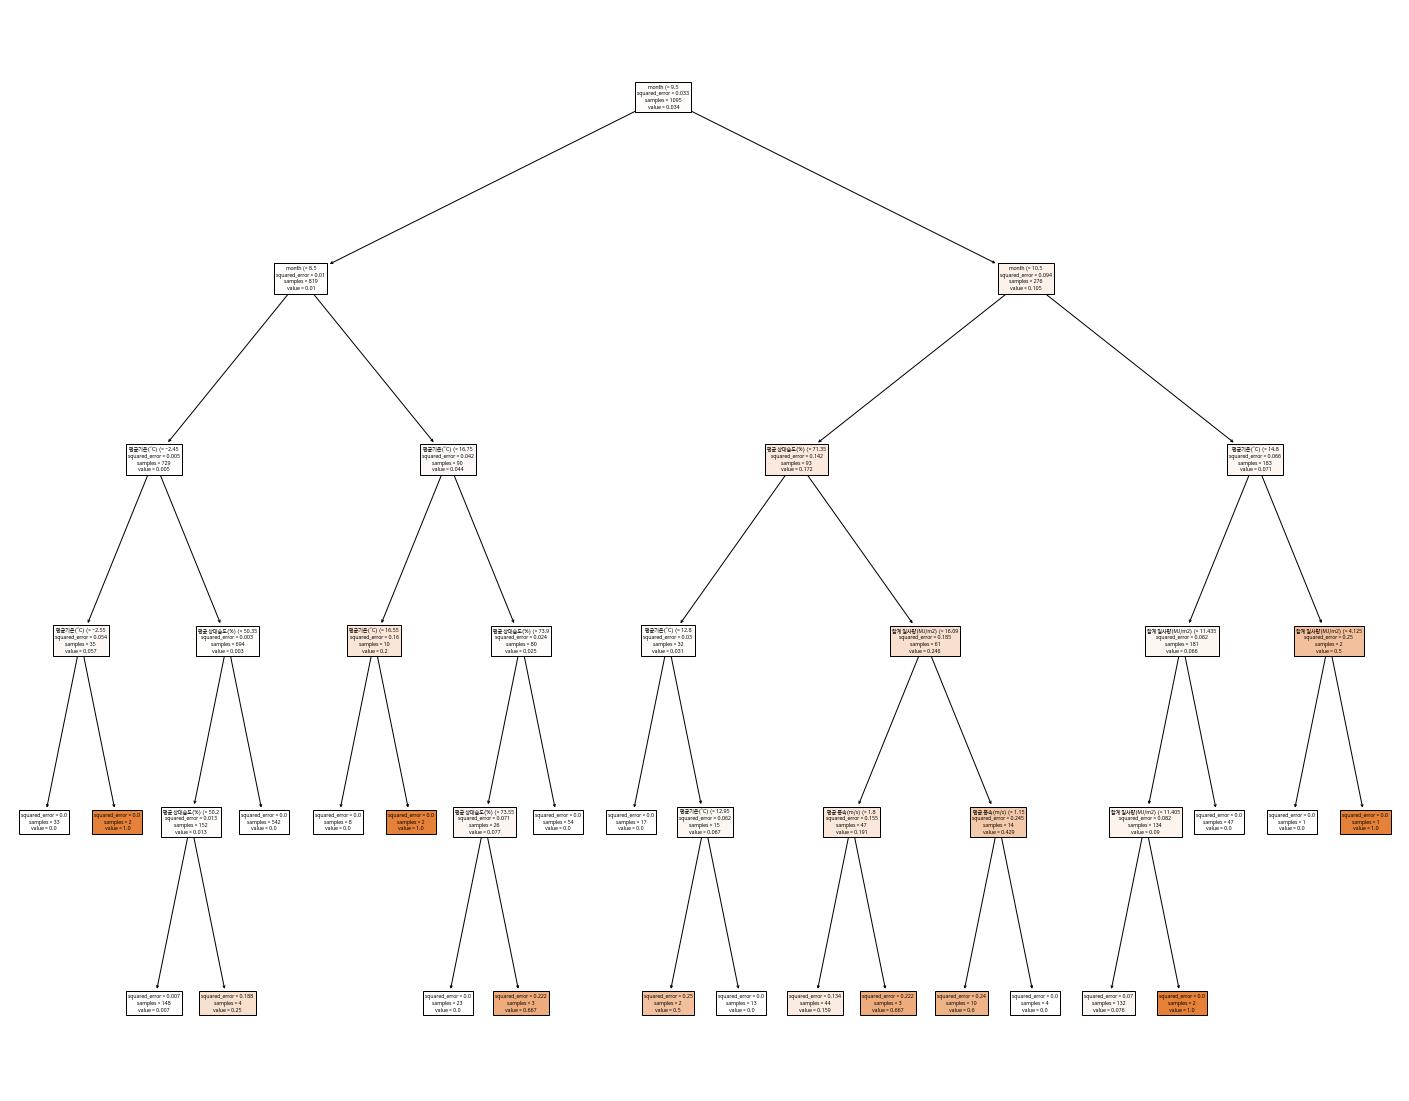

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=X.columns, filled=True)

* 콩정선기

In [15]:
X1 = west2[west2['종류'] == '콩정선기'].iloc[:,4:]
y1 = west2[west2['종류'] == '콩정선기']['건수']

In [16]:
regr1 = DecisionTreeRegressor(max_depth = 5)
regr1.fit(X1, y1)

DecisionTreeRegressor(max_depth=5)

In [ ]:
#y_pred = regr1.predict(X) : Xtest가 들어가야함
#mse = MSE(y_test, y_pred)

In [17]:
text_representation1 = tree.export_text(regr1)
print(text_representation1)

|--- feature_5 <= 10.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_2 <= 1.95
|   |   |   |--- feature_0 <= -4.50
|   |   |   |   |--- feature_3 <= 44.30
|   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- feature_3 >  44.30
|   |   |   |   |   |--- value: [0.50]
|   |   |   |--- feature_0 >  -4.50
|   |   |   |   |--- feature_1 <= 0.35
|   |   |   |   |   |--- value: [0.12]
|   |   |   |   |--- feature_1 >  0.35
|   |   |   |   |   |--- value: [0.50]
|   |   |--- feature_2 >  1.95
|   |   |   |--- feature_0 <= -3.15
|   |   |   |   |--- feature_0 <= -4.60
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  -4.60
|   |   |   |   |   |--- value: [0.33]
|   |   |   |--- feature_0 >  -3.15
|   |   |   |   |--- feature_0 <= -2.80
|   |   |   |   |   |--- value: [5.00]
|   |   |   |   |--- feature_0 >  -2.80
|   |   |   |   |   |--- value: [0.70]
|   |--- feature_5 >  1.50
|   |   |--- feature_5 <= 3.50
|   |   |   |--- feature_2 <= 1.45
|   |   |   |   |---

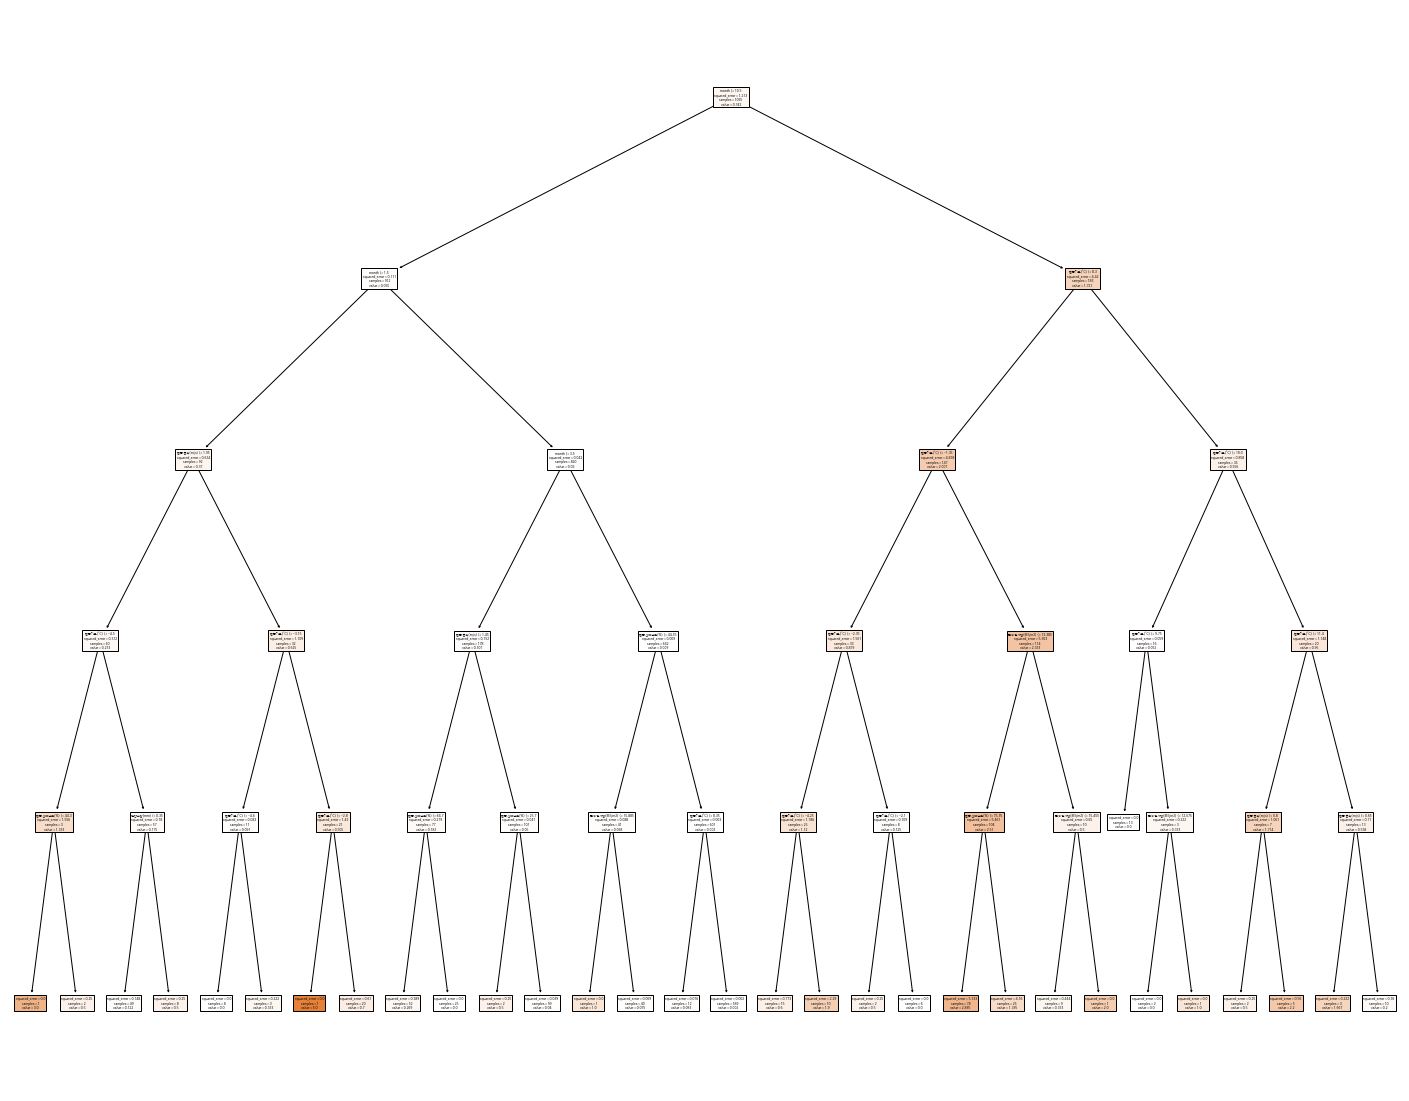

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr1, feature_names=X1.columns, filled=True)

* 모우어

In [ ]:
X3 = west2[west2['종류'] == '모우어'].iloc[:,4:]
y3 = west2[west2['종류'] == '모우어']['건수']

In [ ]:
regr3 = DecisionTreeRegressor()
regr3.fit(X3, y3)

DecisionTreeRegressor()

In [ ]:
text_representation3 = tree.export_text(regr3)
print(text_representation3)

|--- feature_0 <= 21.25
|   |--- feature_0 <= 11.75
|   |   |--- value: [0.00]
|   |--- feature_0 >  11.75
|   |   |--- feature_0 <= 12.15
|   |   |   |--- feature_2 <= 0.65
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_2 >  0.65
|   |   |   |   |--- feature_2 <= 0.85
|   |   |   |   |   |--- feature_4 <= 16.69
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_4 >  16.69
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_2 >  0.85
|   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  12.15
|   |   |   |--- feature_4 <= 17.40
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  17.40
|   |   |   |   |--- feature_4 <= 17.50
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_4 >  17.50
|   |   |   |   |   |--- feature_4 <= 18.22
|   |   |   |   |   |   |--- feature_0 <= 17.80
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_0 >  17.80
|   |   |   |   |   

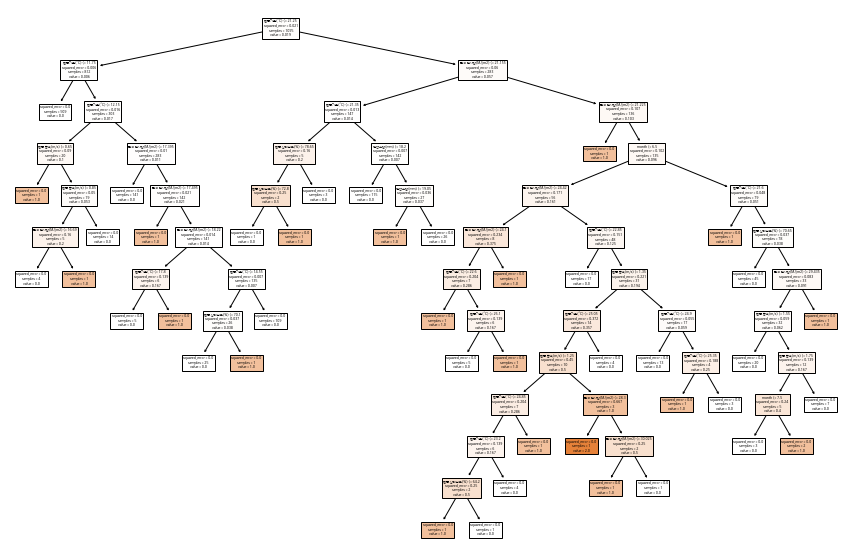

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regr3, feature_names=X3.columns, filled=True)

* 잔가지파쇄기

In [ ]:
X4 = west2[west2['종류'] == '잔가지파쇄기'].iloc[:,4:]
y4 = west2[west2['종류'] == '잔가지파쇄기']['건수']

In [ ]:
regr4 = DecisionTreeRegressor(max_depth = 5)
regr4.fit(X4, y4)

DecisionTreeRegressor(max_depth=5)

In [ ]:
text_representation4 = tree.export_text(regr4)
print(text_representation4)

|--- feature_0 <= 25.25
|   |--- feature_1 <= 86.85
|   |   |--- feature_3 <= 26.40
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_3 >  26.40
|   |   |   |--- feature_0 <= 15.65
|   |   |   |   |--- feature_0 <= 15.55
|   |   |   |   |   |--- value: [0.03]
|   |   |   |   |--- feature_0 >  15.55
|   |   |   |   |   |--- value: [0.50]
|   |   |   |--- feature_0 >  15.65
|   |   |   |   |--- feature_2 <= 1.05
|   |   |   |   |   |--- value: [0.01]
|   |   |   |   |--- feature_2 >  1.05
|   |   |   |   |   |--- value: [0.00]
|   |--- feature_1 >  86.85
|   |   |--- feature_0 <= 21.15
|   |   |   |--- value: [1.00]
|   |   |--- feature_0 >  21.15
|   |   |   |--- value: [0.00]
|--- feature_0 >  25.25
|   |--- feature_3 <= 73.20
|   |   |--- value: [0.00]
|   |--- feature_3 >  73.20
|   |   |--- feature_4 <= 21.09
|   |   |   |--- feature_1 <= 2.55
|   |   |   |   |--- value: [0

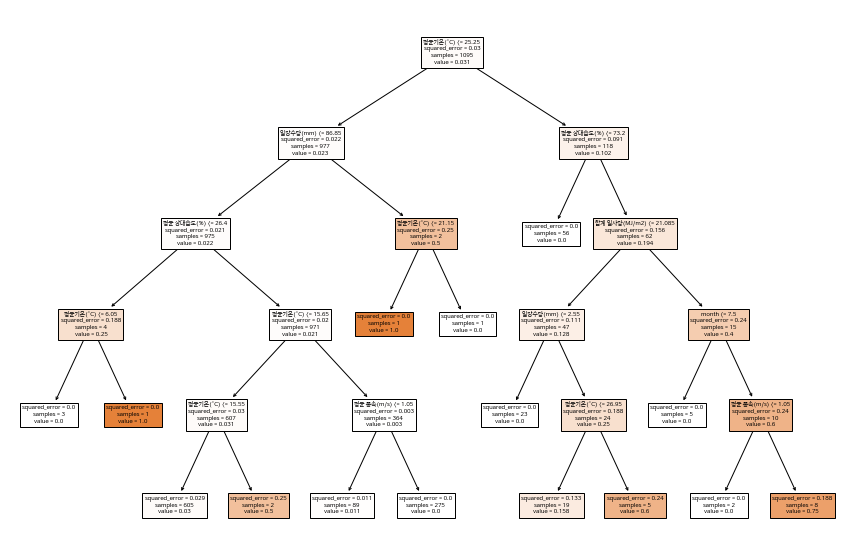

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regr4, feature_names=X4.columns, filled=True)

## nor2 : '콩정선기'|'농산물탈피기'|'모우어'|'보행경운기'|'잔가지파쇄기'

### 콩정선기

In [38]:
X1 = nor2[nor2['종류'] == '콩정선기'].iloc[:,4:]
y1 = nor2[nor2['종류'] == '콩정선기']['건수']

In [39]:
regr_nor1 = DecisionTreeRegressor(max_depth = 8)
regr_nor1.fit(X1, y1)

DecisionTreeRegressor(max_depth=8)

In [40]:
text_representation1 = tree.export_text(regr_nor1)
print(text_representation1)

|--- feature_5 <= 10.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_0 <= -4.85
|   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  -4.85
|   |   |   |--- feature_0 <= 1.25
|   |   |   |   |--- feature_0 <= 1.15
|   |   |   |   |   |--- feature_4 <= 2.98
|   |   |   |   |   |   |--- feature_3 <= 76.75
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- feature_3 >  76.75
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_4 >  2.98
|   |   |   |   |   |   |--- feature_0 <= -0.25
|   |   |   |   |   |   |   |--- feature_3 <= 40.60
|   |   |   |   |   |   |   |   |--- value: [1.40]
|   |   |   |   |   |   |   |--- feature_3 >  40.60
|   |   |   |   |   |   |   |   |--- value: [0.68]
|   |   |   |   |   |   |--- feature_0 >  -0.25
|   |   |   |   |   |   |   |--- feature_2 <= 1.15
|   |   |   |   |   |   |   |   |--- value: [0.33]
|   |   |   |   |   |   |   |--- feature_2 >  1.15
|   |   |   |   |   |   |   |   |--- value: [0.00

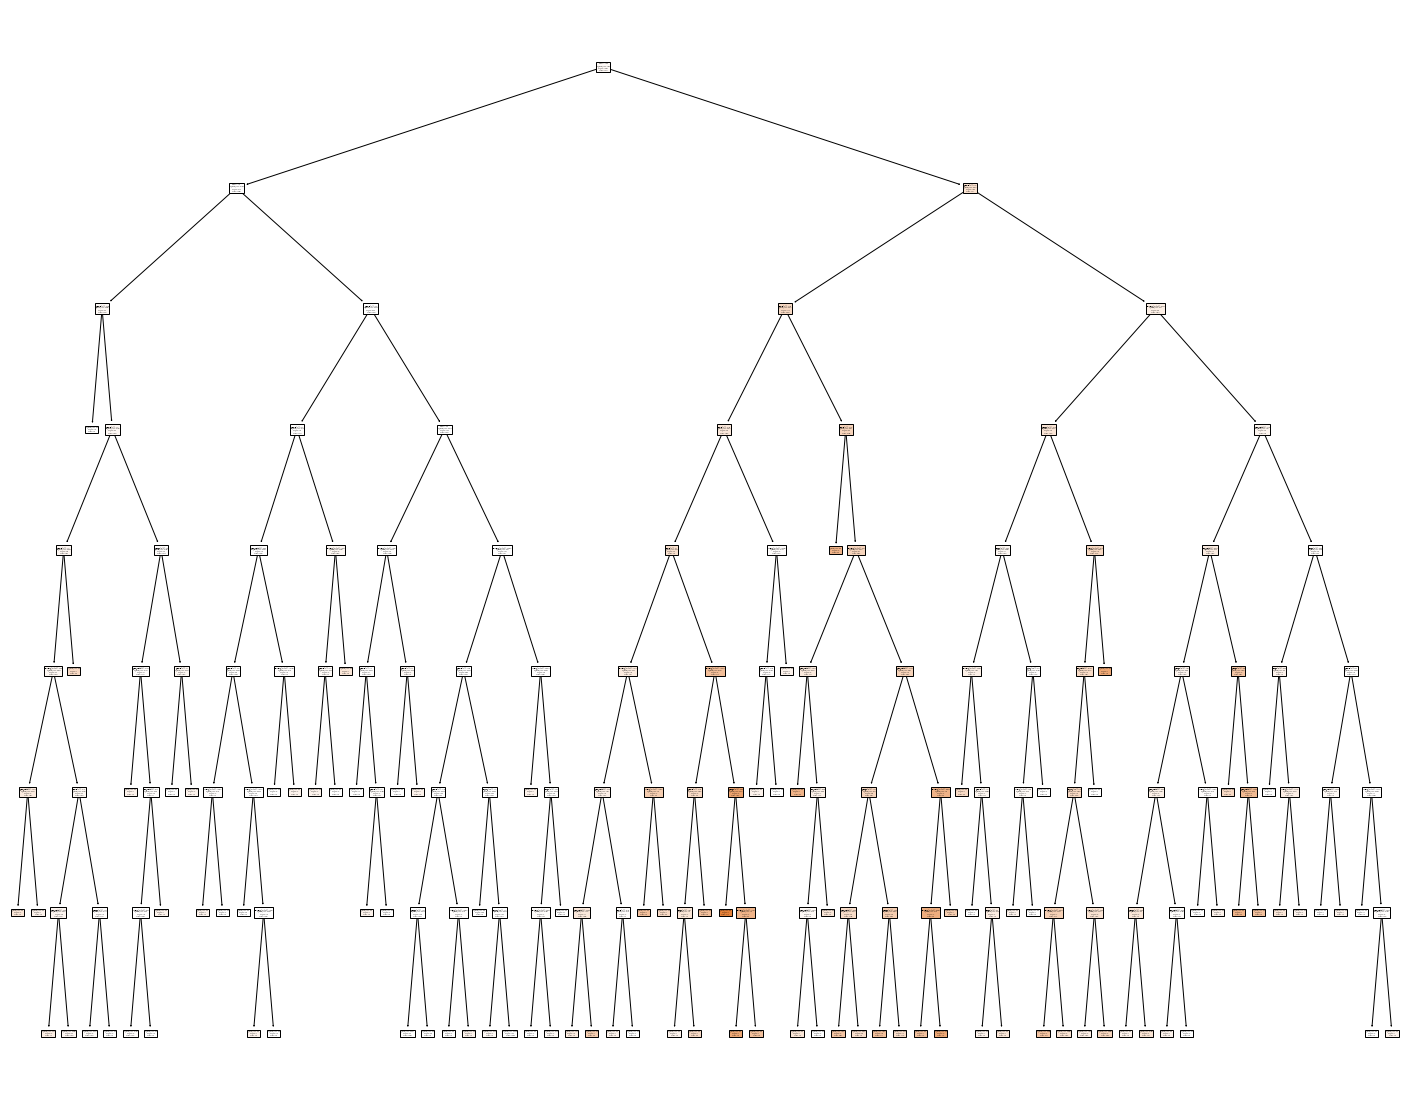

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_nor1, feature_names=X1.columns, filled=True)

### 농산물탈피기

In [ ]:
X2 = nor2[nor2['종류'] == '농산물탈피기'].iloc[:,4:]
y2 = nor2[nor2['종류'] == '농산물탈피기']['건수']

In [ ]:
regr_nor2 = DecisionTreeRegressor(max_depth = 7)
regr_nor2.fit(X2, y2)

DecisionTreeRegressor(max_depth=7)

In [ ]:
text_representation2 = tree.export_text(regr_nor2)
print(text_representation2)

|--- feature_5 <= 9.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 10.53
|   |   |   |--- feature_4 <= 9.62
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- feature_0 <= 2.25
|   |   |   |   |   |   |--- feature_2 <= 1.15
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_2 >  1.15
|   |   |   |   |   |   |   |--- value: [0.27]
|   |   |   |   |   |--- feature_0 >  2.25
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  9.62
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_4 >  10.53
|   |   |   |--- feature_0 <= 2.50
|   |   |   |   |--- feature_2 <= 1.70
|   |   |   |   |   |--- feature_0 <= 0.20
|   |   |   |   |   |   |--- feature_3 <= 44.75
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_3 >  44.75
|   |   |   |   |   |   |   |--- value: [0.18]
|   |   |   |   |   |--- feature_0 >  0.

### 모우어

In [ ]:
X3 = nor2[nor2['종류'] == '모우어'].iloc[:,4:]
y3 = nor2[nor2['종류'] == '모우어']['건수']

In [ ]:
regr_nor3 = DecisionTreeRegressor(max_depth = 7)
regr_nor3.fit(X3, y3)

DecisionTreeRegressor(max_depth=7)

In [ ]:
text_representation3 = tree.export_text(regr_nor3)
print(text_representation3)

|--- feature_4 <= 26.55
|   |--- feature_0 <= 31.20
|   |   |--- feature_5 <= 4.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_5 >  4.50
|   |   |   |--- feature_3 <= 75.45
|   |   |   |   |--- feature_3 <= 72.85
|   |   |   |   |   |--- feature_4 <= 5.49
|   |   |   |   |   |   |--- feature_4 <= 5.17
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_4 >  5.17
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_4 >  5.49
|   |   |   |   |   |   |--- feature_2 <= 1.75
|   |   |   |   |   |   |   |--- value: [0.05]
|   |   |   |   |   |   |--- feature_2 >  1.75
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |--- feature_3 >  72.85
|   |   |   |   |   |--- feature_4 <= 22.38
|   |   |   |   |   |   |--- feature_2 <= 1.15
|   |   |   |   |   |   |   |--- value: [0.16]
|   |   |   |   |   |   |--- feature_2 >  1.15
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_4 >  22.38
|

### 보행경운기

In [19]:
X4 = nor2[nor2['종류'] == '보행경운기'].iloc[:,4:]
y4 = nor2[nor2['종류'] == '보행경운기']['건수']

In [20]:
regr_nor4 = DecisionTreeRegressor(max_depth = 8)
regr_nor4.fit(X4, y4)

DecisionTreeRegressor(max_depth=8)

In [21]:
text_representation4 = tree.export_text(regr_nor4)
print(text_representation4)

|--- feature_5 <= 5.50
|   |--- feature_2 <= 1.25
|   |   |--- feature_0 <= 6.60
|   |   |   |--- feature_4 <= 19.91
|   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_5 >  2.50
|   |   |   |   |   |--- feature_2 <= 0.75
|   |   |   |   |   |   |--- feature_3 <= 77.55
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_3 >  77.55
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_2 >  0.75
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  19.91
|   |   |   |   |--- feature_2 <= 0.85
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_2 >  0.85
|   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  6.60
|   |   |   |--- feature_5 <= 3.50
|   |   |   |   |--- feature_0 <= 10.70
|   |   |   |   |   |--- feature_4 <= 9.21
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_4 >  9.21
|   |   |   |   |   

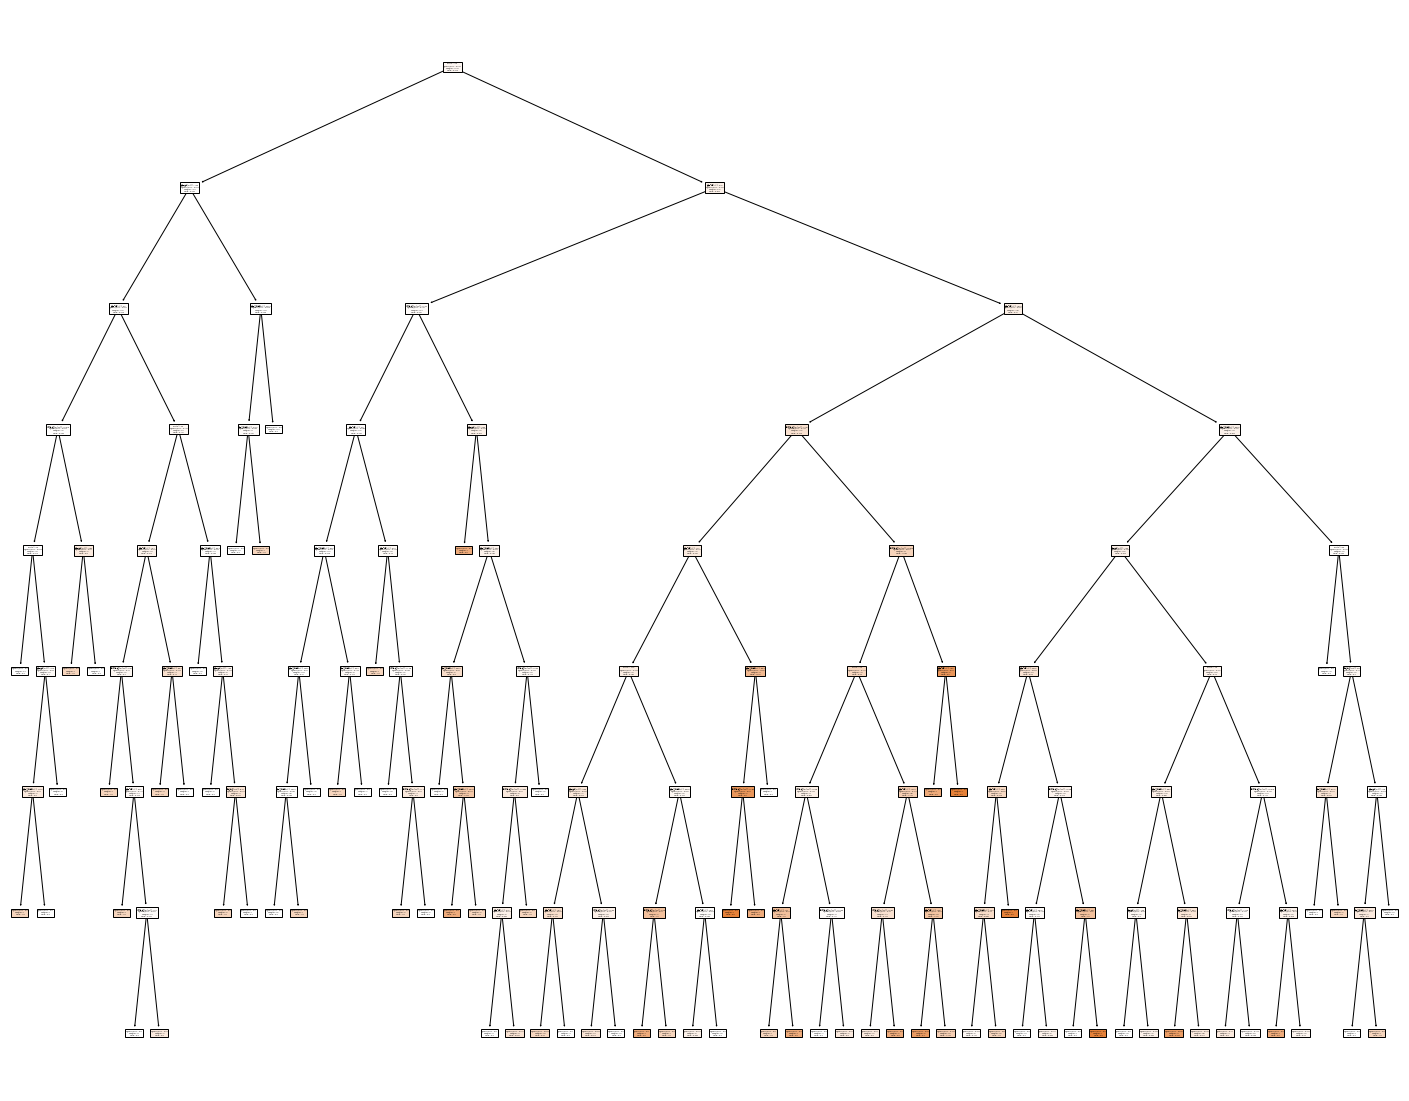

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_nor4, feature_names=X4.columns, filled=True)

### 잔가지파쇄기

In [24]:
X5 = nor2[nor2['종류'] == '잔가지파쇄기'].iloc[:,4:]
y5 = nor2[nor2['종류'] == '잔가지파쇄기']['건수']

In [25]:
regr_nor5 = DecisionTreeRegressor(max_depth = 8)
regr_nor5.fit(X5, y5)

DecisionTreeRegressor(max_depth=8)

In [26]:
text_representation5 = tree.export_text(regr_nor5)
print(text_representation5)

|--- feature_4 <= 19.37
|   |--- feature_4 <= 19.25
|   |   |--- feature_4 <= 11.84
|   |   |   |--- feature_0 <= 9.65
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  9.65
|   |   |   |   |--- feature_0 <= 9.75
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_0 >  9.75
|   |   |   |   |   |--- feature_2 <= 0.65
|   |   |   |   |   |   |--- feature_3 <= 83.85
|   |   |   |   |   |   |   |--- feature_3 <= 80.30
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_3 >  80.30
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_3 >  83.85
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_2 >  0.65
|   |   |   |   |   |   |--- feature_3 <= 76.10
|   |   |   |   |   |   |   |--- feature_3 <= 75.70
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_3 >  75.70
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |

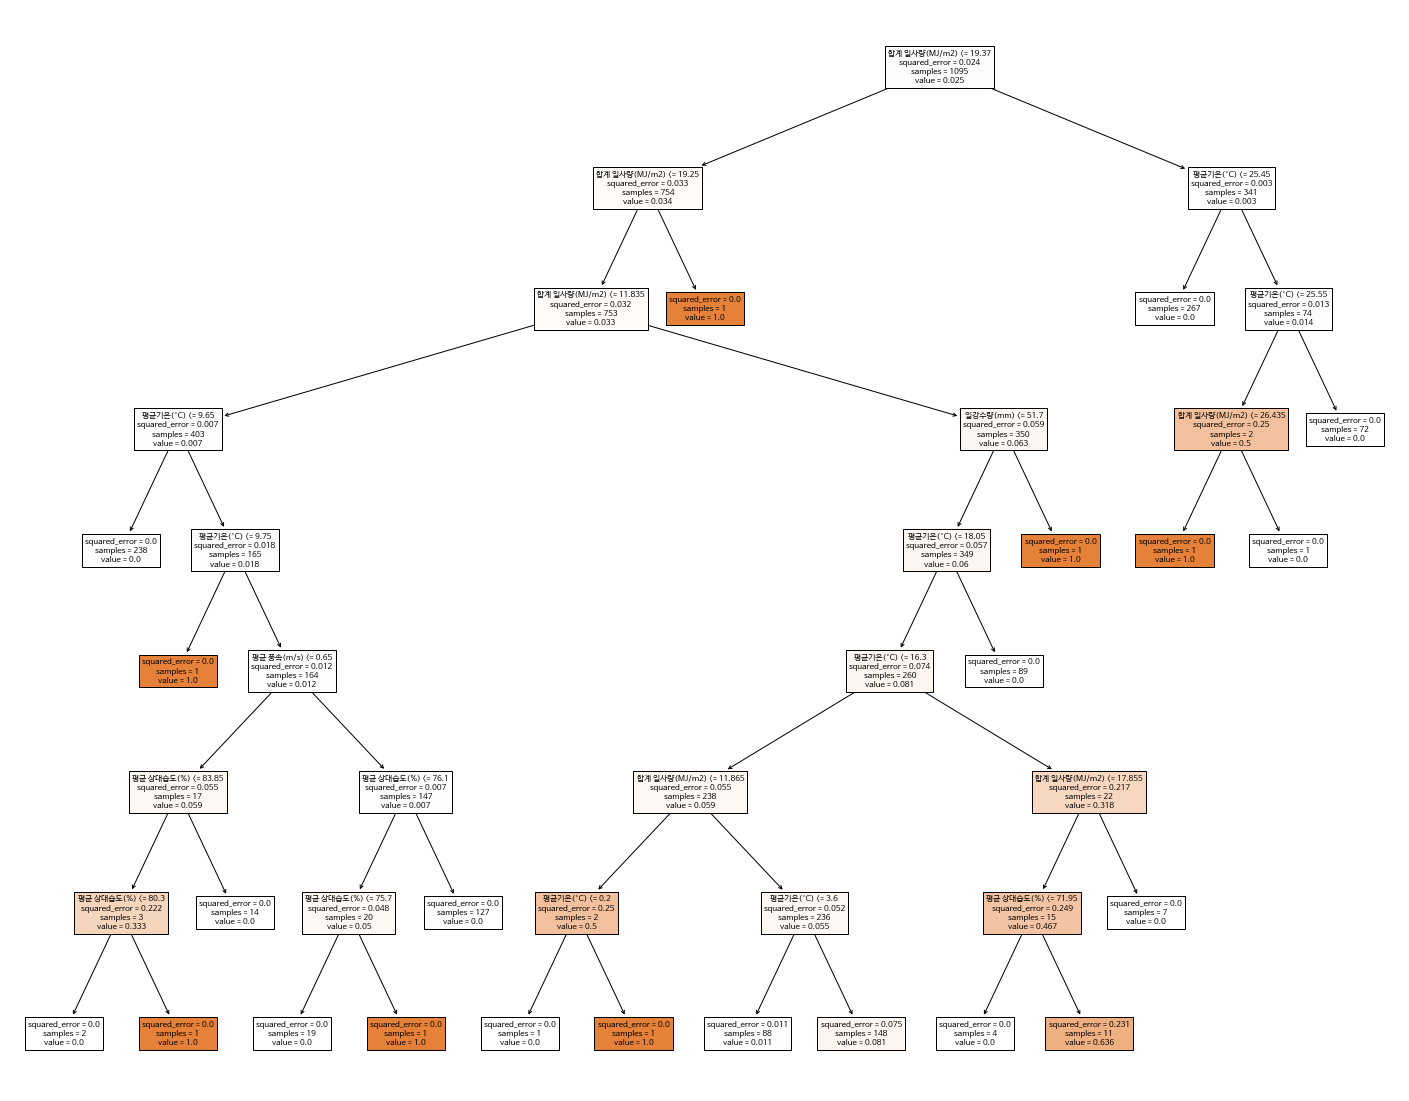

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_nor5, feature_names=X5.columns, filled=True)

## cen2 :'콩정선기'|'동력예취기'|'그레이더'|'농산물탈피기'|'농업용고소작업차'|'농업용동력운반차'|'동력분무기'|'동력파종기'|'보행경운기'|'승용관리기'|'잔가지파쇄기'|'곡물정선기'

In [42]:
X1 = cen2[cen2['종류'] == '콩정선기'].iloc[:,4:]
y1 = cen2[cen2['종류'] == '콩정선기']['건수']

In [43]:
regr_nor1 = DecisionTreeRegressor(max_depth = 8)
regr_nor1.fit(X1, y1)

DecisionTreeRegressor(max_depth=8)

In [44]:
text_representation1 = tree.export_text(regr_nor1)
print(text_representation1)

|--- feature_5 <= 10.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 8.61
|   |   |   |--- value: [0.00]
|   |   |--- feature_4 >  8.61
|   |   |   |--- feature_4 <= 10.19
|   |   |   |   |--- feature_2 <= 0.75
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_2 >  0.75
|   |   |   |   |   |--- feature_3 <= 60.60
|   |   |   |   |   |   |--- feature_3 <= 58.40
|   |   |   |   |   |   |   |--- feature_2 <= 1.45
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_2 >  1.45
|   |   |   |   |   |   |   |   |--- value: [0.20]
|   |   |   |   |   |   |--- feature_3 >  58.40
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- feature_3 >  60.60
|   |   |   |   |   |   |--- feature_4 <= 9.27
|   |   |   |   |   |   |   |--- feature_3 <= 65.95
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_3 >  65.95
|   |   |   |   |   |   |   |   |--- value: [1.50]
|   |   |   |  

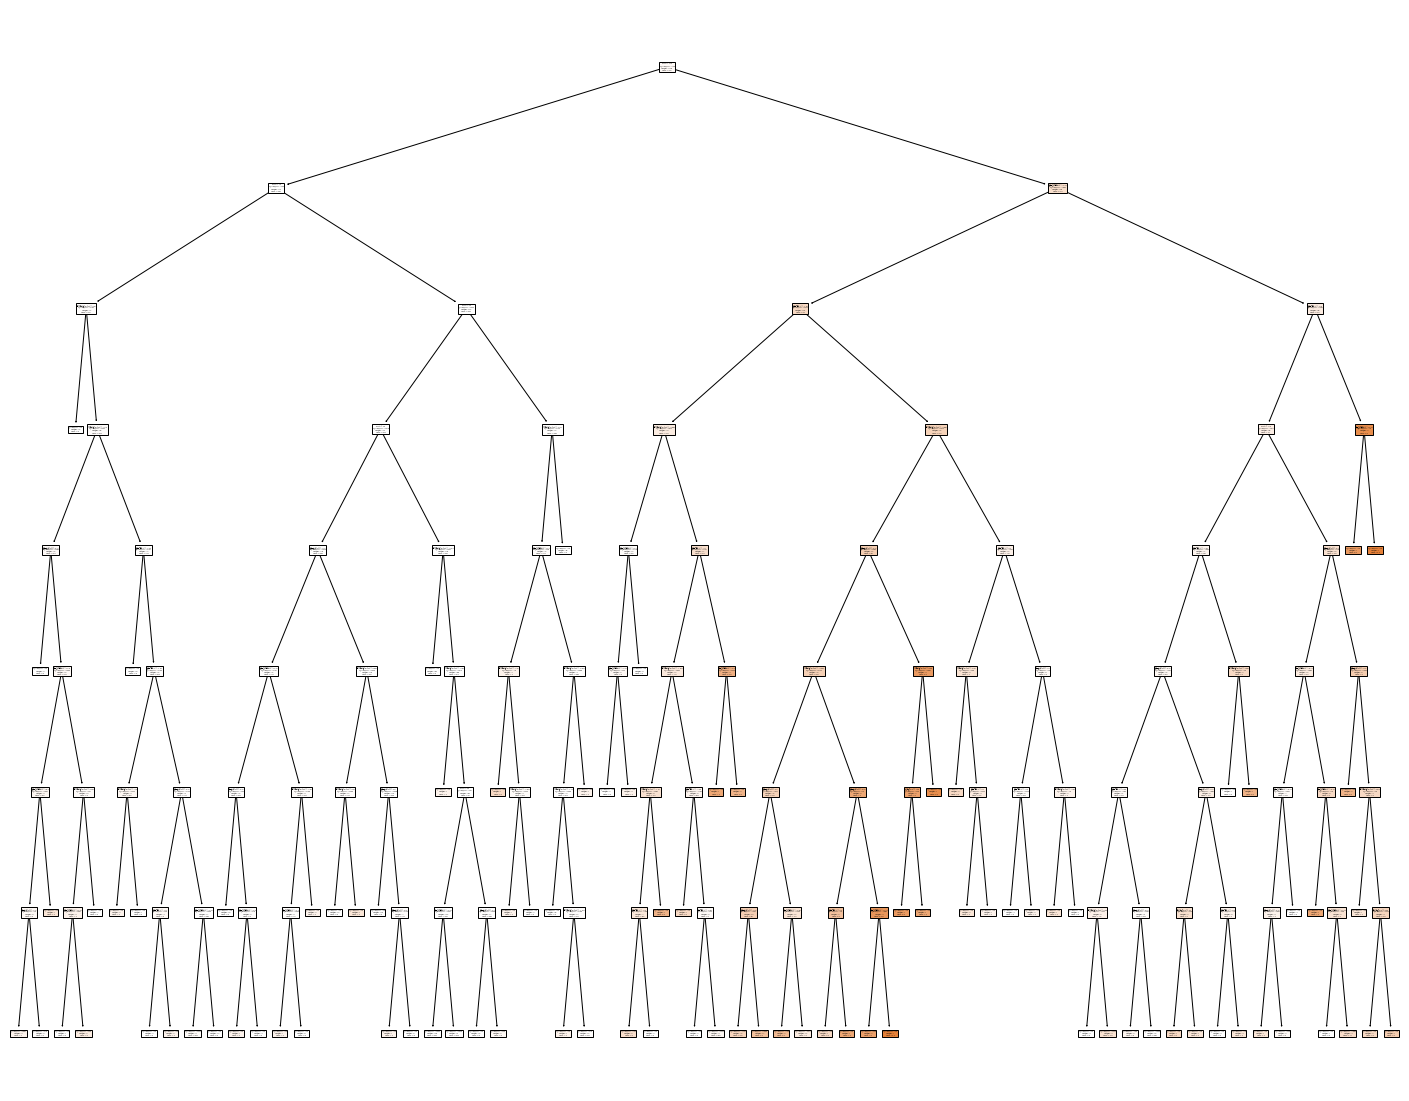

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_nor1, feature_names=X1.columns, filled=True)

### 2.동력예취기

In [46]:
X2 = cen2[cen2['종류'] == '동력예취기'].iloc[:,4:]
y2 = cen2[cen2['종류'] == '동력예취기']['건수']

regr_cen2 = DecisionTreeRegressor(max_depth = 8)
regr_cen2.fit(X2, y2)

text_representation2 = tree.export_text(regr_cen2)
print(text_representation2)

|--- feature_5 <= 5.50
|   |--- feature_4 <= 30.76
|   |   |--- feature_3 <= 50.35
|   |   |   |--- feature_3 <= 50.20
|   |   |   |   |--- feature_0 <= 12.80
|   |   |   |   |   |--- feature_3 <= 46.85
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_3 >  46.85
|   |   |   |   |   |   |--- feature_3 <= 46.95
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_3 >  46.95
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  12.80
|   |   |   |   |   |--- feature_2 <= 0.95
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_2 >  0.95
|   |   |   |   |   |   |--- feature_0 <= 13.00
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_0 >  13.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_3 >  50.20
|   |   |   |   |--- feature_0 <= 5.40
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  5.40
|   |   

### 3. 그레이더

In [47]:
X3 = cen2[cen2['종류'] == '그레이더'].iloc[:,4:]
y3 = cen2[cen2['종류'] == '그레이더']['건수']

regr_cen3 = DecisionTreeRegressor(max_depth = 8)
regr_cen3.fit(X3, y3)

text_representation3 = tree.export_text(regr_cen3)
print(text_representation3)

|--- feature_4 <= 31.04
|   |--- feature_4 <= 22.70
|   |   |--- feature_3 <= 36.70
|   |   |   |--- feature_2 <= 1.20
|   |   |   |   |--- feature_4 <= 12.02
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_4 >  12.02
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_2 >  1.20
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_3 >  36.70
|   |   |   |--- feature_4 <= 13.14
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  13.14
|   |   |   |   |--- feature_4 <= 13.17
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_4 >  13.17
|   |   |   |   |   |--- feature_4 <= 13.28
|   |   |   |   |   |   |--- feature_4 <= 13.27
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_4 >  13.27
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_4 >  13.28
|   |   |   |   |   |   |--- feature_3 <= 82.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   | 

### 4. 농산물탈피기

In [48]:
X4 = cen2[cen2['종류'] == '농산물탈피기'].iloc[:,4:]
y4 = cen2[cen2['종류'] == '농산물탈피기']['건수']

regr_cen4 = DecisionTreeRegressor(max_depth = 8)
regr_cen4.fit(X4, y4)

text_representation4 = tree.export_text(regr_cen4)
print(text_representation4)

|--- feature_5 <= 9.50
|   |--- feature_5 <= 8.50
|   |   |--- feature_2 <= 0.35
|   |   |   |--- feature_2 <= 0.25
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_2 >  0.25
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_2 >  0.35
|   |   |   |--- feature_0 <= 1.25
|   |   |   |   |--- feature_0 <= 1.15
|   |   |   |   |   |--- feature_4 <= 15.18
|   |   |   |   |   |   |--- feature_4 <= 7.69
|   |   |   |   |   |   |   |--- feature_4 <= 7.03
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_4 >  7.03
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_4 >  7.69
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_4 >  15.18
|   |   |   |   |   |   |--- feature_3 <= 51.50
|   |   |   |   |   |   |   |--- feature_4 <= 17.00
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_4 >  17.00
|   |   |   |   |   |   |   |   |--- v

### 5. 농업용고소작업차

In [49]:
X5 = cen2[cen2['종류'] == '농업용고소작업차'].iloc[:,4:]
y5 = cen2[cen2['종류'] == '농업용고소작업차']['건수']

regr_cen5 = DecisionTreeRegressor(max_depth = 8)
regr_cen5.fit(X5, y5)

text_representation5 = tree.export_text(regr_cen5)
print(text_representation5)

|--- feature_0 <= 12.75
|   |--- feature_4 <= 10.15
|   |   |--- feature_1 <= 36.95
|   |   |   |--- feature_0 <= 3.25
|   |   |   |   |--- feature_0 <= 3.05
|   |   |   |   |   |--- feature_3 <= 75.00
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_3 >  75.00
|   |   |   |   |   |   |--- feature_0 <= 2.15
|   |   |   |   |   |   |   |--- feature_3 <= 76.45
|   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |--- feature_3 >  76.45
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_0 >  2.15
|   |   |   |   |   |   |   |--- feature_5 <= 6.50
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_5 >  6.50
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  3.05
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_0 >  3.25
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_1 >  36.95
|   |   |   |--- feature_2 

### 6. 농업용동력운반차

In [50]:
X6 = cen2[cen2['종류'] == '농업용동력운반차'].iloc[:,4:]
y6 = cen2[cen2['종류'] == '농업용동력운반차']['건수']

regr_cen6 = DecisionTreeRegressor(max_depth = 8)
regr_cen6.fit(X6, y6)

text_representation6 = tree.export_text(regr_cen6)
print(text_representation6)

|--- feature_5 <= 10.50
|   |--- feature_2 <= 0.85
|   |   |--- feature_5 <= 9.50
|   |   |   |--- feature_4 <= 13.99
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  13.99
|   |   |   |   |--- feature_4 <= 14.20
|   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- feature_4 >  14.20
|   |   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |   |--- feature_0 <= 4.10
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_0 >  4.10
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_5 >  2.50
|   |   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_5 >  9.50
|   |   |   |--- feature_3 <= 66.05
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_3 >  66.05
|   |   |   |   |--- feature_4 <= 13.70
|   |   |   |   |   |--- feature_0 <= 13.75
|   |   |   |   |   |   |--- feature_4 <= 7.42
|   |   |   |   |   |   |   |--- feature_1 <= 0.40
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   

### 7. 동력분무기

In [51]:
X7 = cen2[cen2['종류'] == '동력분무기'].iloc[:,4:]
y7 = cen2[cen2['종류'] == '동력분무기']['건수']

regr_cen7 = DecisionTreeRegressor(max_depth = 8)
regr_cen7.fit(X7, y7)

text_representation7 = tree.export_text(regr_cen7)
print(text_representation7)

|--- feature_0 <= 19.45
|   |--- feature_4 <= 21.74
|   |   |--- feature_0 <= 9.75
|   |   |   |--- feature_4 <= 18.61
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  18.61
|   |   |   |   |--- feature_4 <= 18.80
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_4 >  18.80
|   |   |   |   |   |--- feature_3 <= 56.20
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_3 >  56.20
|   |   |   |   |   |   |--- feature_3 <= 57.20
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_3 >  57.20
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  9.75
|   |   |   |--- feature_5 <= 5.50
|   |   |   |   |--- feature_0 <= 10.00
|   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  10.00
|   |   |   |   |   |--- feature_1 <= 3.05
|   |   |

### 동력파종기

In [52]:
X8 = cen2[cen2['종류'] == '동력파종기'].iloc[:,4:]
y8 = cen2[cen2['종류'] == '동력파종기']['건수']

regr_cen8 = DecisionTreeRegressor(max_depth = 8)
regr_cen8.fit(X8, y8)

text_representation8 = tree.export_text(regr_cen8)
print(text_representation8)

|--- feature_0 <= 7.65
|   |--- feature_4 <= 21.13
|   |   |--- feature_1 <= 5.30
|   |   |   |--- value: [0.00]
|   |   |--- feature_1 >  5.30
|   |   |   |--- feature_2 <= 3.00
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_2 >  3.00
|   |   |   |   |--- value: [1.00]
|   |--- feature_4 >  21.13
|   |   |--- feature_2 <= 1.25
|   |   |   |--- value: [1.00]
|   |   |--- feature_2 >  1.25
|   |   |   |--- value: [0.00]
|--- feature_0 >  7.65
|   |--- feature_5 <= 3.50
|   |   |--- feature_0 <= 13.75
|   |   |   |--- feature_3 <= 38.80
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_3 >  38.80
|   |   |   |   |--- feature_0 <= 7.80
|   |   |   |   |   |--- feature_2 <= 1.00
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_2 >  1.00
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  7.80
|   |   |   |   |   |--- feature_3 <= 47.80
|   |   |   |   |   |   |--- feature_4 <= 17.61
|   |   |   |   |   |   |   |--- 

### 9. 보행경운기

In [53]:
X9 = cen2[cen2['종류'] == '보행경운기'].iloc[:,4:]
y9 = cen2[cen2['종류'] == '보행경운기']['건수']

regr_cen9 = DecisionTreeRegressor(max_depth = 8)
regr_cen9.fit(X9, y9)

text_representation9 = tree.export_text(regr_cen9)
print(text_representation9)

|--- feature_5 <= 5.50
|   |--- feature_0 <= 5.45
|   |   |--- feature_4 <= 14.35
|   |   |   |--- value: [0.00]
|   |   |--- feature_4 >  14.35
|   |   |   |--- feature_1 <= 4.80
|   |   |   |   |--- feature_4 <= 14.38
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_4 >  14.38
|   |   |   |   |   |--- feature_2 <= 2.45
|   |   |   |   |   |   |--- feature_2 <= 2.25
|   |   |   |   |   |   |   |--- feature_0 <= -0.75
|   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |--- feature_0 >  -0.75
|   |   |   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |   |--- feature_2 >  2.25
|   |   |   |   |   |   |   |--- feature_3 <= 52.75
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_3 >  52.75
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_2 >  2.45
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_1 >  4.80
|   |   |   |   |--- value: [1.

### 10. 승용관리기

In [54]:
X10 = cen2[cen2['종류'] == '승용관리기'].iloc[:,4:]
y10 = cen2[cen2['종류'] == '승용관리기']['건수']

regr_cen10 = DecisionTreeRegressor(max_depth = 8)
regr_cen10.fit(X10, y10)

text_representation10 = tree.export_text(regr_cen10)
print(text_representation10)

|--- feature_5 <= 6.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_4 <= 1.18
|   |   |   |--- feature_4 <= 1.05
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_4 >  1.05
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_4 >  1.18
|   |   |   |--- feature_4 <= 9.87
|   |   |   |   |--- feature_4 <= 9.85
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_4 >  9.85
|   |   |   |   |   |--- feature_0 <= -0.65
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_0 >  -0.65
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_4 >  9.87
|   |   |   |   |--- value: [0.00]
|   |--- feature_5 >  2.50
|   |   |--- feature_3 <= 45.70
|   |   |   |--- feature_3 <= 44.55
|   |   |   |   |--- feature_3 <= 39.00
|   |   |   |   |   |--- feature_2 <= 1.35
|   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- feature_2 >  1.35
|   |   |   |   |   |   |--- feature_3 <= 38.05
|   |   |   |   |   |   |   |--- feature

### 11. 잔가지파쇄기

In [55]:
X11 = cen2[cen2['종류'] == '잔가지파쇄기'].iloc[:,4:]
y11 = cen2[cen2['종류'] == '잔가지파쇄기']['건수']

regr_cen11 = DecisionTreeRegressor(max_depth = 8)
regr_cen11.fit(X11, y11)

text_representation11 = tree.export_text(regr_cen11)
print(text_representation11)

|--- feature_4 <= 0.34
|   |--- feature_3 <= 68.70
|   |   |--- value: [0.00]
|   |--- feature_3 >  68.70
|   |   |--- value: [1.00]
|--- feature_4 >  0.34
|   |--- feature_0 <= 11.60
|   |   |--- feature_4 <= 16.23
|   |   |   |--- feature_0 <= 5.35
|   |   |   |   |--- feature_5 <= 11.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_5 >  11.50
|   |   |   |   |   |--- feature_4 <= 7.45
|   |   |   |   |   |   |--- feature_4 <= 7.09
|   |   |   |   |   |   |   |--- feature_3 <= 75.00
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_3 >  75.00
|   |   |   |   |   |   |   |   |--- value: [0.29]
|   |   |   |   |   |   |--- feature_4 >  7.09
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_4 >  7.45
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.70
|   |

### 12. 곡물정선기

In [56]:
X12 = cen2[cen2['종류'] == '곡물정선기'].iloc[:,4:]
y12 = cen2[cen2['종류'] == '곡물정선기']['건수']

regr_cen12 = DecisionTreeRegressor(max_depth = 8)
regr_cen12.fit(X12, y12)

text_representation12 = tree.export_text(regr_cen12)
print(text_representation12)

|--- feature_5 <= 8.50
|   |--- feature_0 <= 1.55
|   |   |--- feature_4 <= 2.00
|   |   |   |--- value: [1.00]
|   |   |--- feature_4 >  2.00
|   |   |   |--- feature_0 <= -1.35
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  -1.35
|   |   |   |   |--- feature_2 <= 2.75
|   |   |   |   |   |--- feature_2 <= 0.80
|   |   |   |   |   |   |--- feature_4 <= 10.28
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_4 >  10.28
|   |   |   |   |   |   |   |--- feature_4 <= 12.86
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_4 >  12.86
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_2 >  0.80
|   |   |   |   |   |   |--- feature_4 <= 16.56
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_4 >  16.56
|   |   |   |   |   |   |   |--- feature_0 <= 0.20
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--